# **Drift Detection and Visualization using Clustering**

## **1. Necessary imports** ##

In [1]:
import sys
import numpy as np
import pandas as pd

sys.path.append('/Users/Kuba/Desktop/DriftDetectionWithExplainableAI')

from src.datasets import get_dataset
from src.common import DataDimensionsReducer, ReducerType
from src.clustering import ClusterBasedDriftDetector
from src.clustering import plot_clusters_by_class, plot_drift_clustered, plot_centers_shift

/Users/Kuba/Desktop/DriftDetectionWithExplainableAI/bachelor_venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## **2. Drift detection using Clustering**

Cluster data before and after the drift. When desc statistics in corresponding clusters differ - detect drift

In [2]:
# TODO
# * Poprawic nazwy kolumn w stats_shifts
# * zastanowic sie czy by nie ujac jeszcze ilosci instancji per skupienie

# TODO LATER:
# a) teraz on wykrywa dryf miedzy boxem A i boxem B - zrobić tak, zeby wykrywal sudden drift miedzy boxem A i boxem B oraz gradual drift;
# b) eksperymenty dla częsci 2
# c) Explainability jakos zrobic
# d) Eksperymenty dla czesci 3

In [3]:
size_of_box = 1000
generator = get_dataset("hyperplane_drift")
X, y = generator.generate(size_of_box, size_of_box, 3, 2)
half = len(X)//2

X_old, X_new = X.loc[:half-1], X.loc[half:]
y_old, y_new = y[:half], y[half:]

CBDD = ClusterBasedDriftDetector(X_old, y_old, X_new, y_new, random_state=42)
CBDD.detect()

labels_old = CBDD.cluster_labels_old
labels_new = CBDD.cluster_labels_new

/Users/Kuba/Desktop/DriftDetectionWithExplainableAI/src/clustering/clustering.py:625: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats_combined.fillna('-', inplace=True)


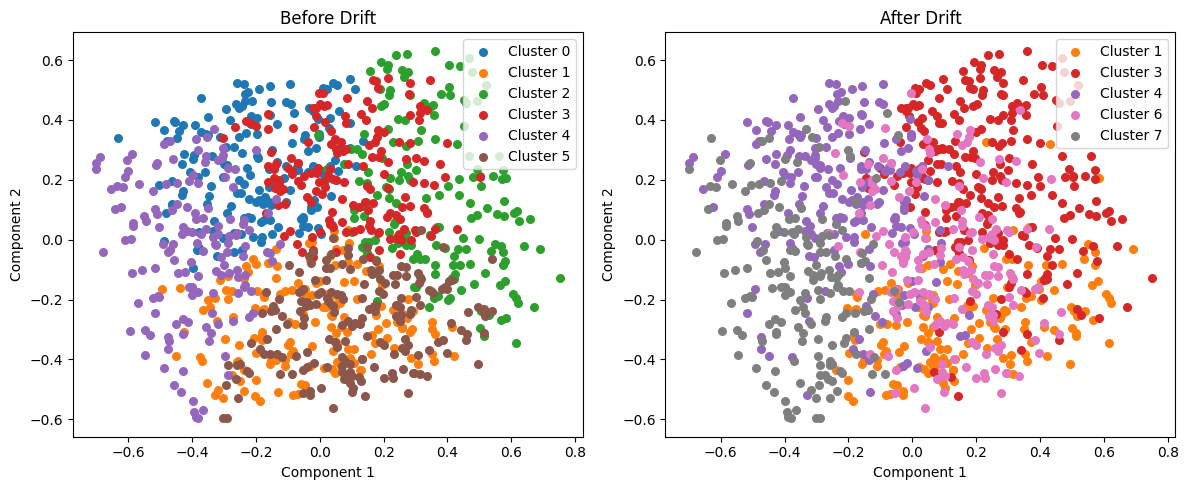

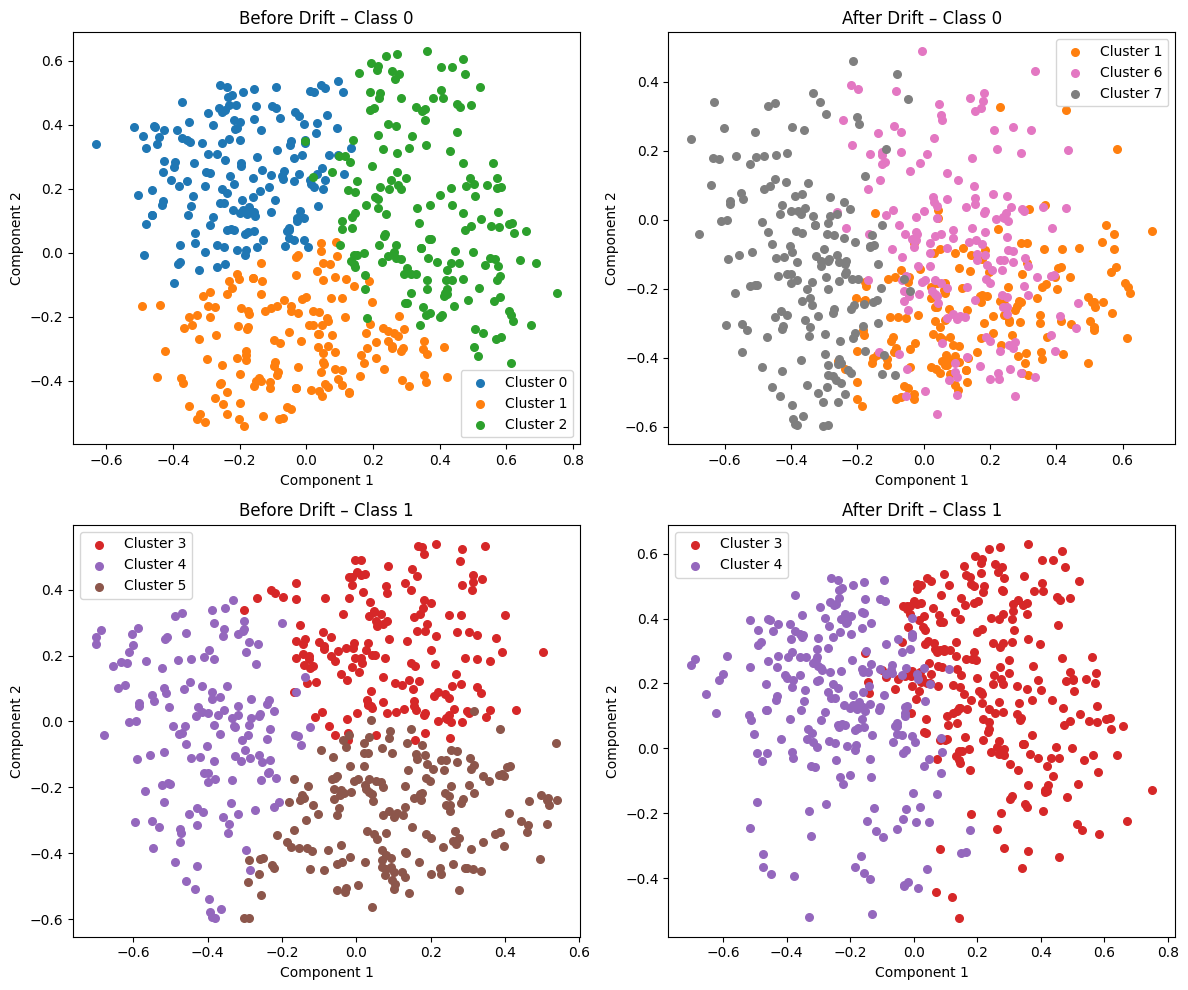

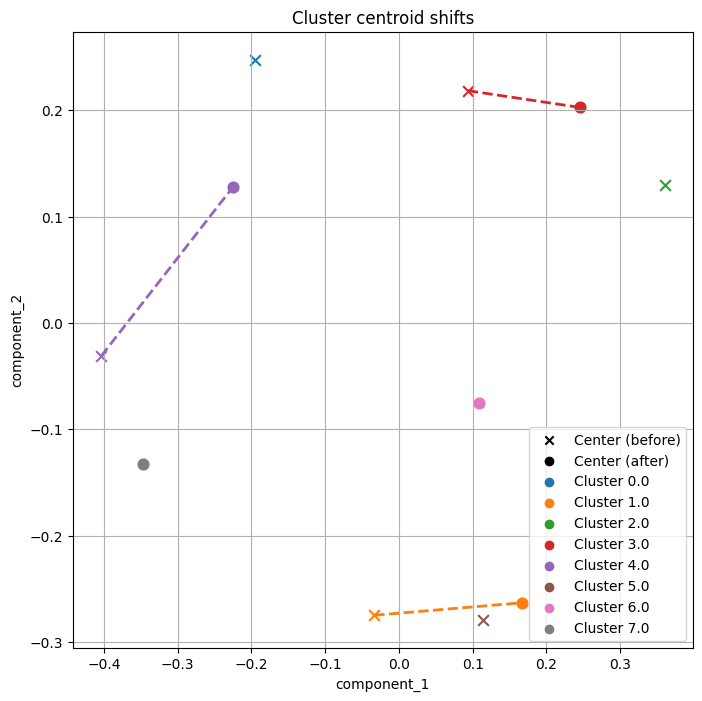

In [4]:
plot_drift_clustered(X_old, X_new, y_old, y_new, labels_old, labels_new)
plot_clusters_by_class(X_old, X_new, y_old, y_new, labels_old, labels_new)
plot_centers_shift(X_old, X_new, y_old, y_new, labels_old, labels_new)

In [5]:
CBDD.cluster_shifts

{np.float64(0.0): 'disappeared',
 np.float64(1.0): {'distance_per_feature': array([-0.06393396, -0.08766662,  0.76123068]),
  'euclidean_distance': np.float64(0.7689246650691409)},
 np.float64(2.0): 'disappeared',
 np.float64(3.0): {'distance_per_feature': array([-1.1367738 , -0.33704894, -0.10697097]),
  'euclidean_distance': np.float64(1.1905038657597884)},
 np.float64(4.0): {'distance_per_feature': array([-1.37093716,  0.22179948,  0.03746109]),
  'euclidean_distance': np.float64(1.3892685297453493)},
 np.float64(5.0): 'disappeared',
 np.float64(6.0): 'appeared',
 np.float64(7.0): 'appeared'}

In [6]:
CBDD.drift_details

{np.int64(0): {'nr_of_clusters': False,
  'centroid_shift': False,
  'desc_stats_changes': {np.float64(0.0): {0: {'max': True,
     'mean': True,
     'median': True,
     'min': True,
     'std': True},
    1: {'max': True, 'mean': True, 'median': True, 'min': True, 'std': True},
    2: {'max': True, 'mean': True, 'median': True, 'min': True, 'std': True}},
   np.float64(1.0): {0: {'max': True,
     'mean': False,
     'median': False,
     'min': False,
     'std': False},
    1: {'max': True,
     'mean': False,
     'median': False,
     'min': False,
     'std': False},
    2: {'max': True, 'mean': True, 'median': True, 'min': False, 'std': True}},
   np.float64(2.0): {0: {'max': True,
     'mean': True,
     'median': True,
     'min': True,
     'std': True},
    1: {'max': True, 'mean': True, 'median': True, 'min': True, 'std': True},
    2: {'max': True, 'mean': True, 'median': True, 'min': True, 'std': True}},
   np.float64(6.0): {0: {'max': True,
     'mean': True,
     'med

## **3. Experiments** ##

In [13]:
def conduct_experiments_hyperplane_2d(size_of_block, nr_of_features=2, nr_of_drift_features=2):
    size_of_box = size_of_block
    generator = get_dataset("hyperplane_drift")
    X, y = generator.generate(size_of_box, size_of_box, nr_of_features, nr_of_drift_features)
    half = len(X)//2

    X_old, X_new = X.loc[:half-1], X.loc[half:]
    y_old, y_new = y[:half], y[half:]

    X_old, X_new = X_new, X_old
    y_old, y_new = y_new, y_old

    CBDD = ClusterBasedDriftDetector(X_old, y_old, X_new, y_new, random_state=42)
    CBDD.detect()

    labels_old = CBDD.cluster_labels_old
    labels_new = CBDD.cluster_labels_new

    print(f"Drift occured: {CBDD.drift_flag}")
    print(CBDD.drift_details)

    plot_drift_clustered(X_old.values, X_new.values, y_old.values, y_new.values, labels_old, labels_new)
    plot_clusters_by_class(X_old.values, X_new.values, y_old, y_new, labels_old, labels_new)
    plot_centers_shift(X_old, X_new, y_old, y_new, labels_old, labels_new)

In [14]:
def conduct_experiments_hyperplane_multidimensional(size_of_block, nr_of_features, nr_of_drift_features):
    size_of_box = size_of_block
    generator = get_dataset("hyperplane_drift")
    X, y = generator.generate(size_of_block, size_of_block, nr_of_features, nr_of_drift_features)

    X_old, X_new = X.loc[:size_of_box-1], X.loc[size_of_box:]
    y_old, y_new = y[:size_of_box], y[size_of_box:]

    CBDD = ClusterBasedDriftDetector(X_old, y_old, X_new, y_new)
    CBDD.detect()

    labels_old = CBDD.cluster_labels_old
    labels_new = CBDD.cluster_labels_new

    print(f"Drift detected?: {CBDD.drift_flag}")
    print(CBDD.drift_details)

    plot_drift_clustered(X_old, X_new, y_old, y_new, labels_old, labels_new)
    plot_clusters_by_class(X_old, X_new, y_old, y_new, labels_old, labels_new)
    plot_centers_shift(X_old, X_new, y_old, y_new, labels_old, labels_new)

### **7.3. Clustering**

#### **7.3.1. Hyperplane**

**1. Hyperplane 2D**

/Users/Kuba/Desktop/DriftDetectionWithExplainableAI/src/clustering/clustering.py:625: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats_combined.fillna('-', inplace=True)


Drift occured: True
{np.int64(0): {'nr_of_clusters': True, 'centroid_shift': False, 'desc_stats_changes': {np.float64(0.0): {0: {'max': True, 'mean': True, 'median': True, 'min': True, 'std': True}, 1: {'max': True, 'mean': True, 'median': True, 'min': True, 'std': True}}, np.float64(1.0): {0: {'max': np.True_, 'mean': np.True_, 'median': np.True_, 'min': np.False_, 'std': np.False_}, 1: {'max': np.True_, 'mean': np.False_, 'median': np.False_, 'min': np.False_, 'std': np.False_}}, np.float64(2.0): {0: {'max': np.True_, 'mean': np.False_, 'median': np.False_, 'min': np.False_, 'std': np.False_}, 1: {'max': np.False_, 'mean': np.False_, 'median': np.False_, 'min': np.True_, 'std': np.False_}}, np.float64(3.0): {0: {'max': True, 'mean': True, 'median': True, 'min': True, 'std': True}, 1: {'max': True, 'mean': True, 'median': True, 'min': True, 'std': True}}}}, np.int64(1): {'nr_of_clusters': True, 'centroid_shift': False, 'desc_stats_changes': {np.float64(4.0): {0: {'max': np.False_, 'me

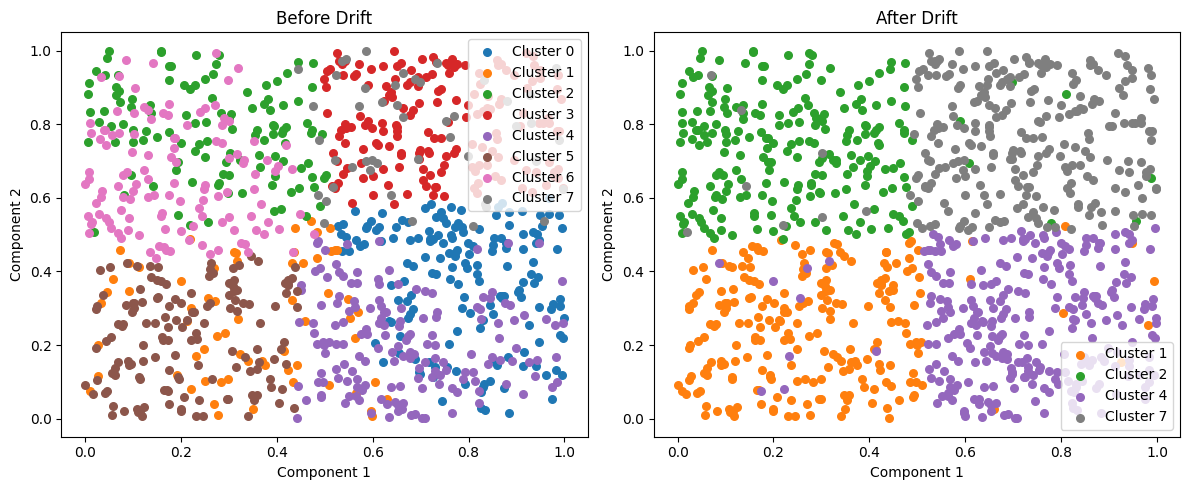

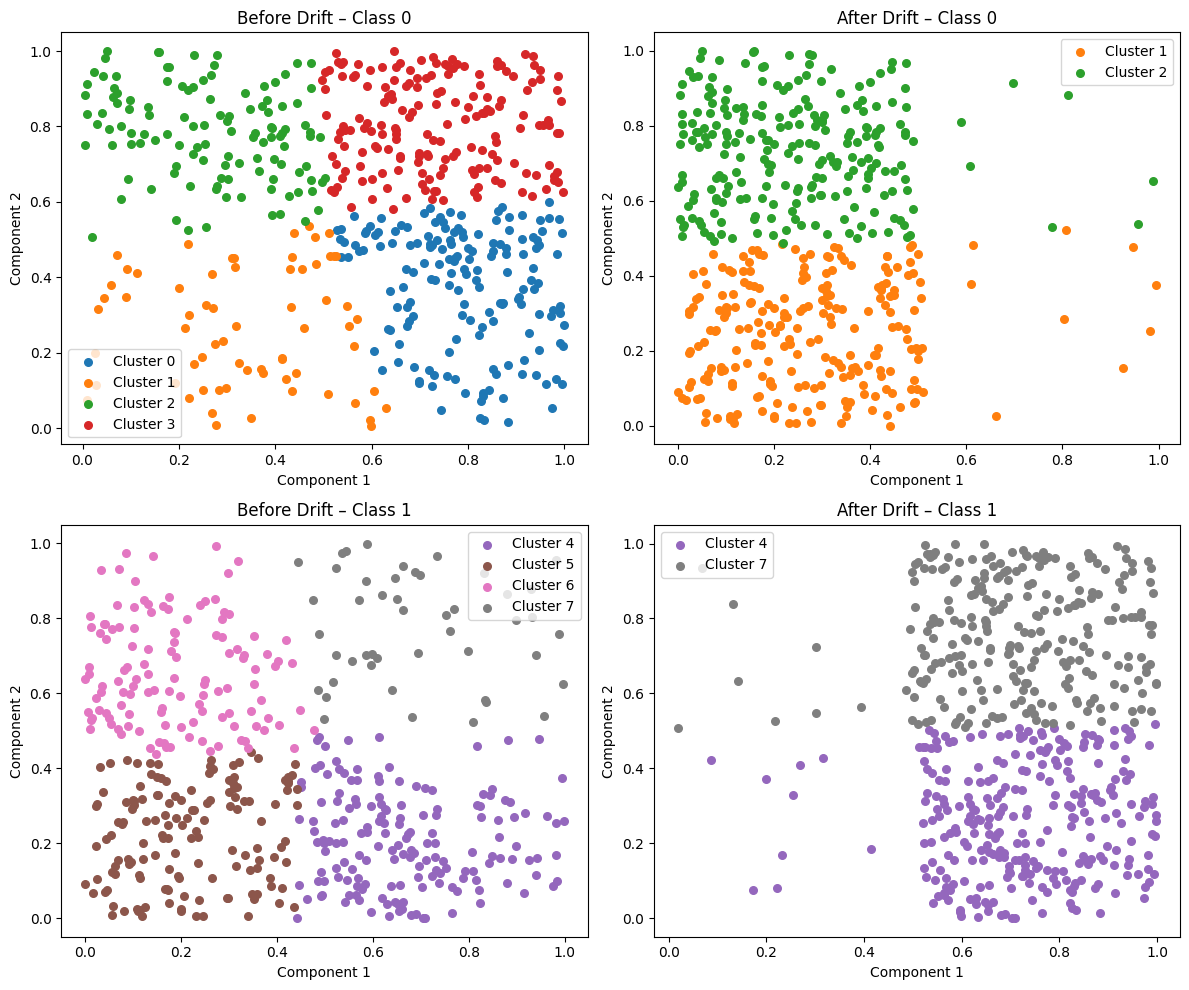

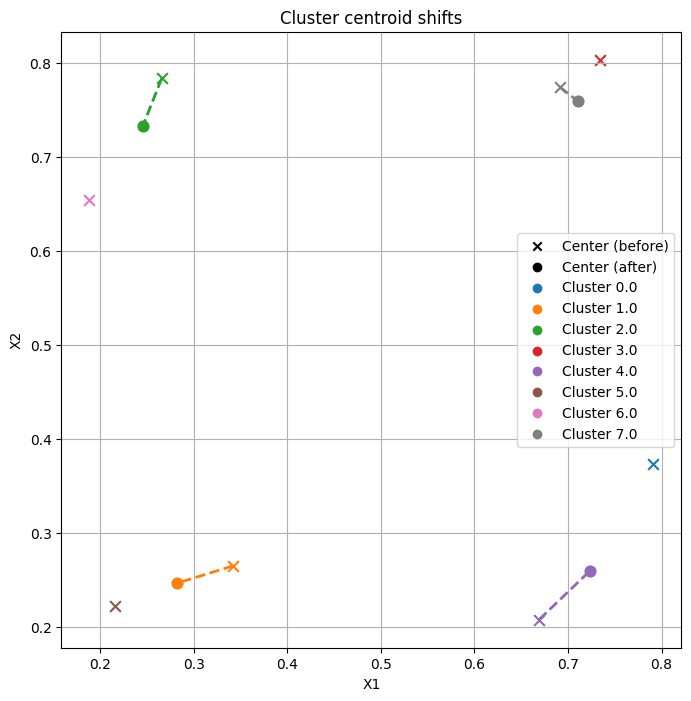

In [15]:
conduct_experiments_hyperplane_2d(1000)

**2. Hyperplane 3D with only relevant features**

/Users/Kuba/Desktop/DriftDetectionWithExplainableAI/src/clustering/clustering.py:612: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats_combined.fillna('-', inplace=True)


Drift detected?: True
{np.int64(0): {'nr_of_clusters': True, 'centroid_shift': False, 'desc_stats_changes': {np.float64(0.0): {0: {'max': np.False_, 'mean': np.True_, 'median': np.True_, 'min': np.False_, 'std': np.True_}, 1: {'max': np.False_, 'mean': np.False_, 'median': np.False_, 'min': np.True_, 'std': np.False_}, 2: {'max': np.True_, 'mean': np.True_, 'median': np.True_, 'min': np.False_, 'std': np.True_}}, np.float64(1.0): {0: {'max': np.True_, 'mean': np.True_, 'median': np.True_, 'min': np.False_, 'std': np.True_}, 1: {'max': np.True_, 'mean': np.False_, 'median': np.False_, 'min': np.False_, 'std': np.False_}, 2: {'max': np.True_, 'mean': np.True_, 'median': np.True_, 'min': np.False_, 'std': np.True_}}, np.float64(4.0): {0: {'max': True, 'mean': True, 'median': True, 'min': True, 'std': True}, 1: {'max': True, 'mean': True, 'median': True, 'min': True, 'std': True}, 2: {'max': True, 'mean': True, 'median': True, 'min': True, 'std': True}}, np.float64(5.0): {0: {'max': True, 

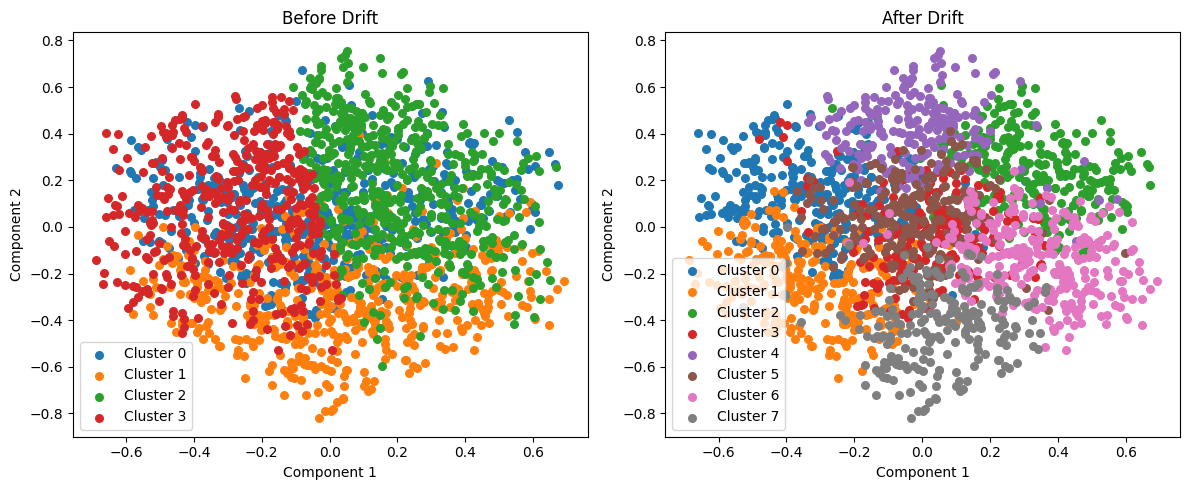

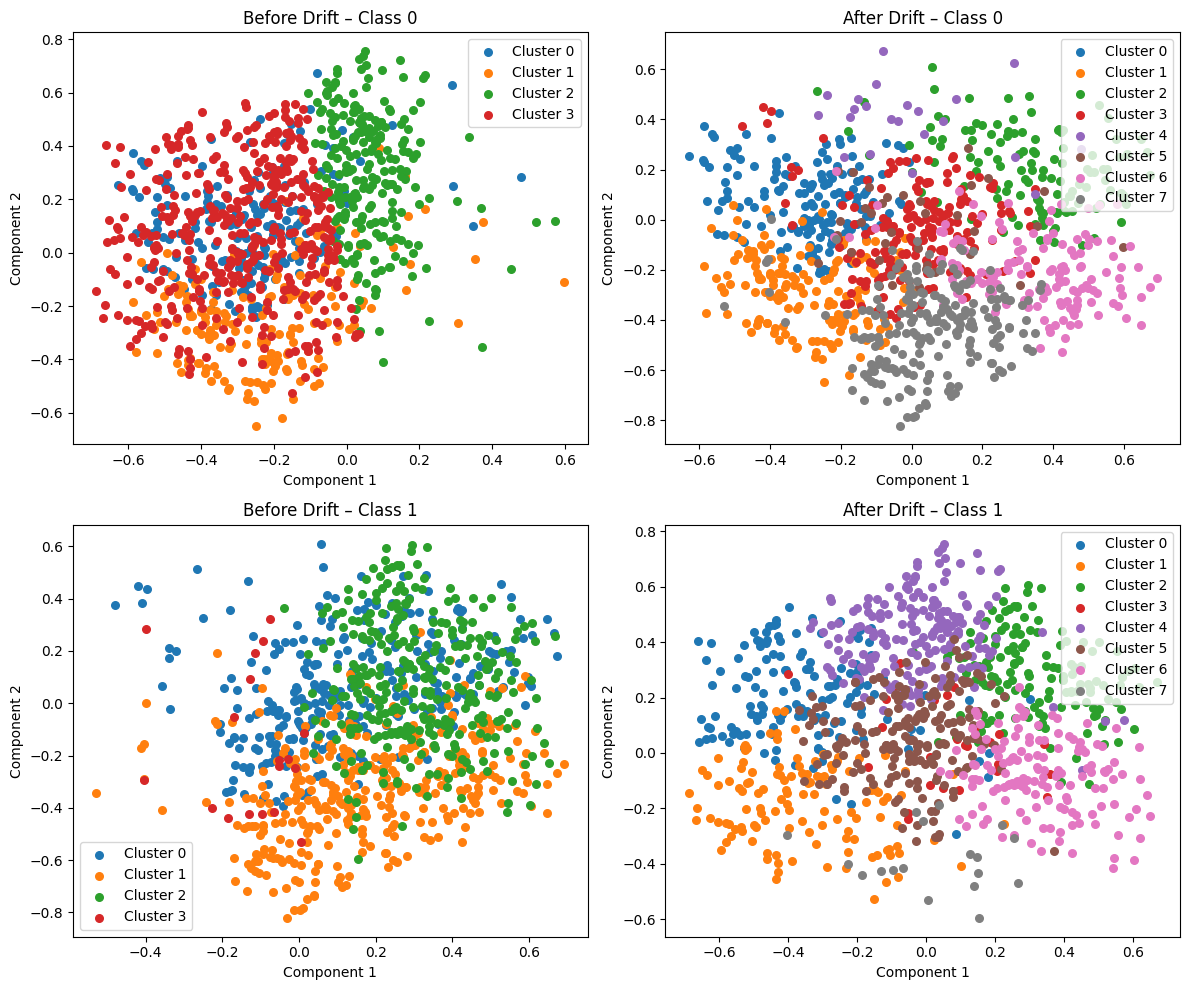

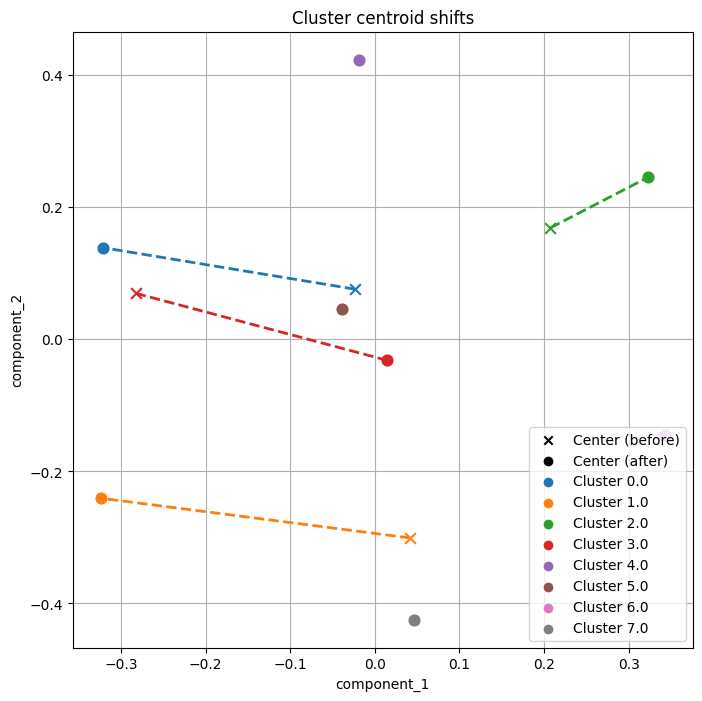

In [17]:
conduct_experiments_hyperplane_multidimensional(2000, 3, 3)

**3. Hyperplane 3D - not all features drift**

Drift detected?: True
{np.int64(0): {'nr_of_clusters': True, 'centroid_shift': True, 'desc_stats_changes': {np.float64(0.0): {0: {'max': np.False_, 'mean': np.True_, 'median': np.True_, 'min': np.True_, 'std': np.True_}, 1: {'max': np.False_, 'mean': np.True_, 'median': np.True_, 'min': np.True_, 'std': np.False_}, 2: {'max': np.True_, 'mean': np.True_, 'median': np.True_, 'min': np.False_, 'std': np.True_}}, np.float64(1.0): {0: {'max': True, 'mean': True, 'median': True, 'min': True, 'std': True}, 1: {'max': True, 'mean': True, 'median': True, 'min': True, 'std': True}, 2: {'max': True, 'mean': True, 'median': True, 'min': True, 'std': True}}, np.float64(2.0): {0: {'max': np.False_, 'mean': np.True_, 'median': np.True_, 'min': np.True_, 'std': np.False_}, 1: {'max': np.False_, 'mean': np.True_, 'median': np.True_, 'min': np.True_, 'std': np.True_}, 2: {'max': np.False_, 'mean': np.False_, 'median': np.False_, 'min': np.False_, 'std': np.False_}}, np.float64(3.0): {0: {'max': np.False

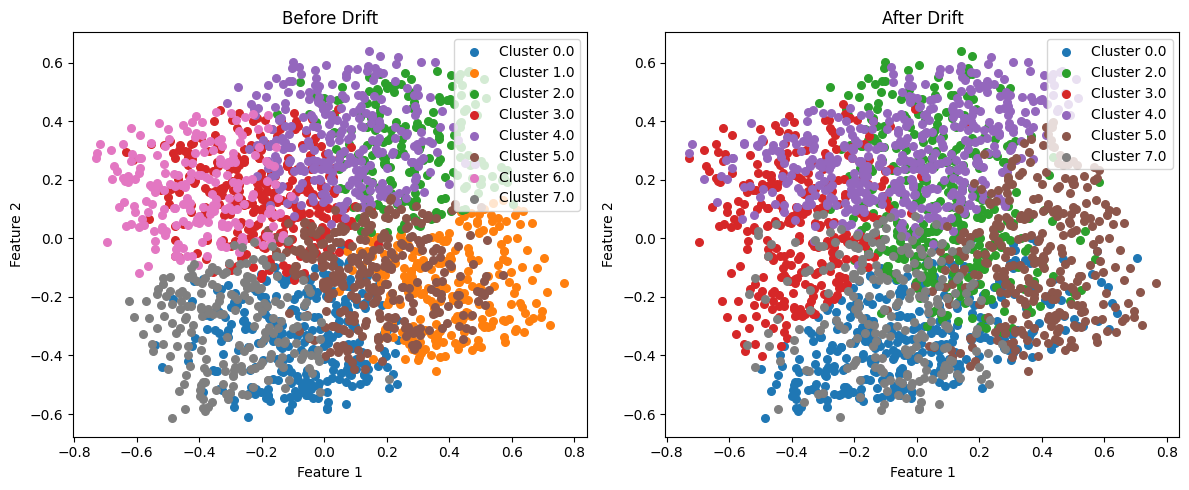

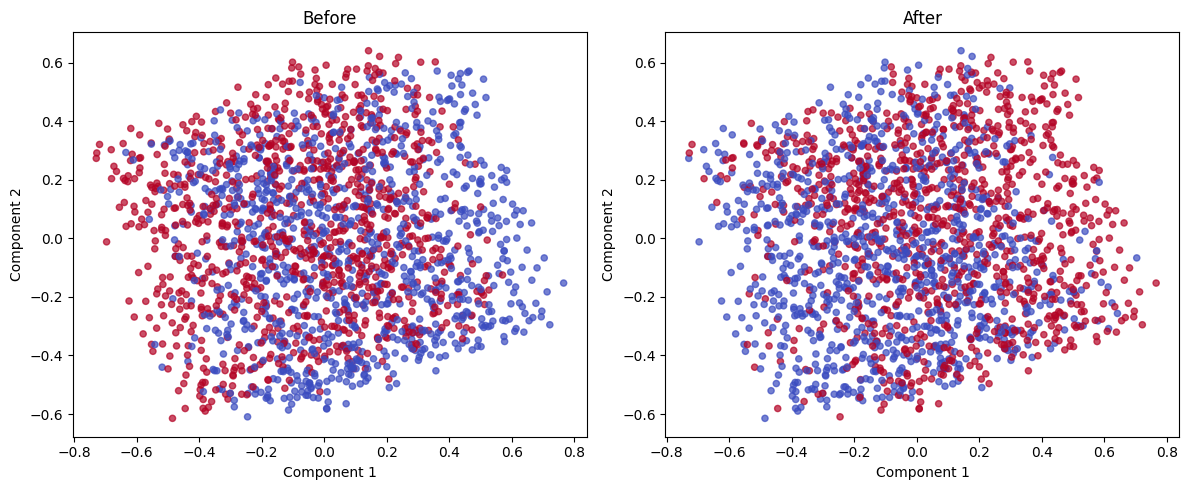

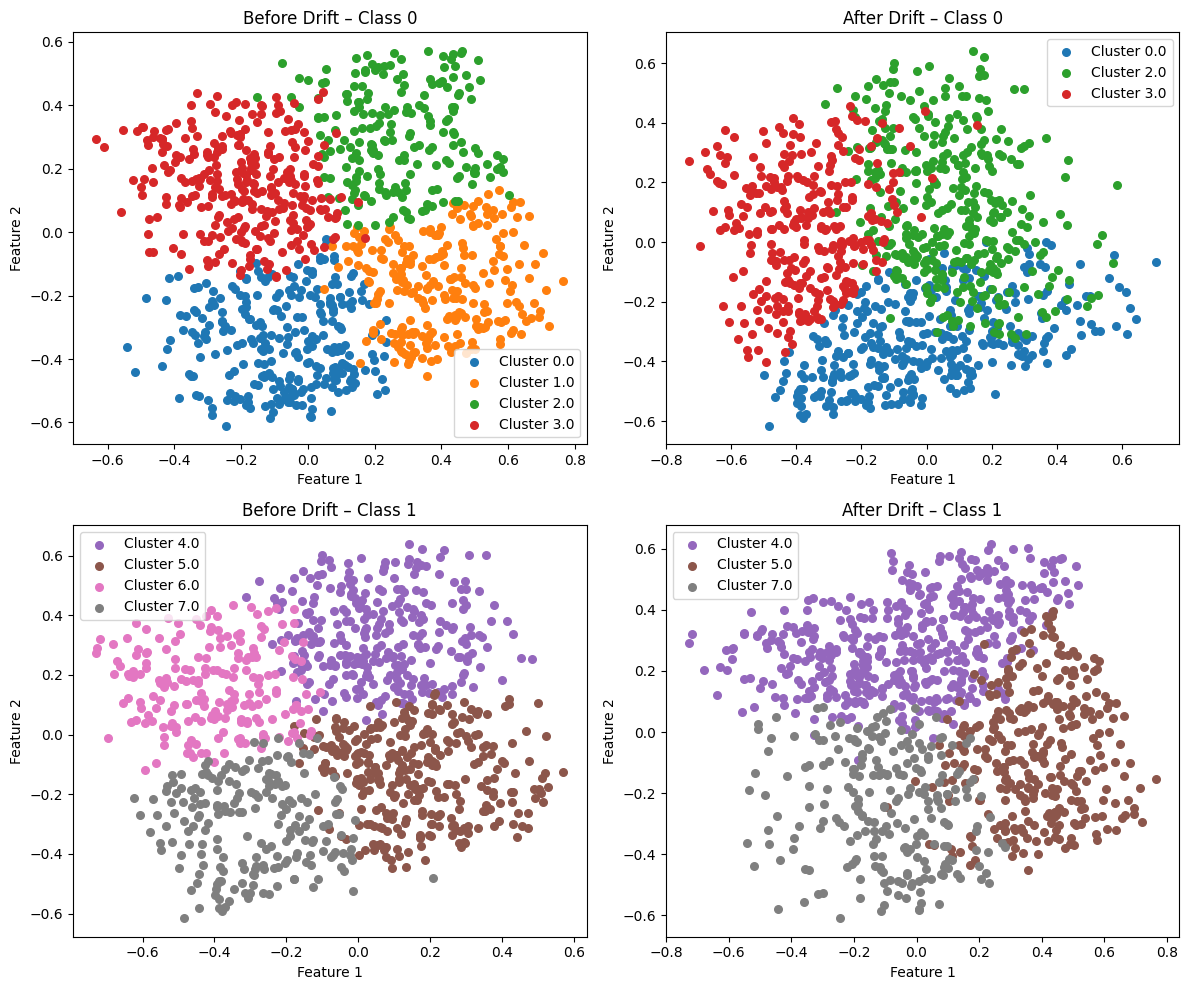

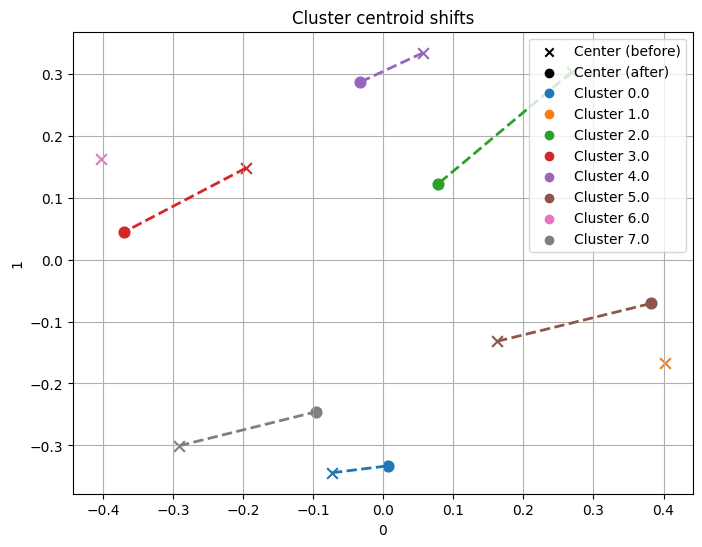

In [34]:
conduct_experiments_hyperplane_multidimensional(2000, 3, 2)

**4. Hyperplane multidimensional - not all features drift**

Drift detected?: True
{np.int64(0): {'nr_of_clusters': False, 'centroid_shift': True, 'desc_stats_changes': {np.float64(0.0): {0: {'max': np.False_, 'mean': np.False_, 'median': np.False_, 'min': np.True_, 'std': np.False_}, 1: {'max': np.False_, 'mean': np.False_, 'median': np.True_, 'min': np.True_, 'std': np.False_}, 2: {'max': np.False_, 'mean': np.True_, 'median': np.True_, 'min': np.True_, 'std': np.False_}, 3: {'max': np.False_, 'mean': np.True_, 'median': np.True_, 'min': np.False_, 'std': np.True_}, 4: {'max': np.True_, 'mean': np.False_, 'median': np.False_, 'min': np.False_, 'std': np.True_}}, np.float64(1.0): {0: {'max': np.False_, 'mean': np.True_, 'median': np.True_, 'min': np.True_, 'std': np.True_}, 1: {'max': np.False_, 'mean': np.False_, 'median': np.True_, 'min': np.True_, 'std': np.False_}, 2: {'max': np.False_, 'mean': np.False_, 'median': np.False_, 'min': np.True_, 'std': np.False_}, 3: {'max': np.False_, 'mean': np.False_, 'median': np.True_, 'min': np.True_, 's

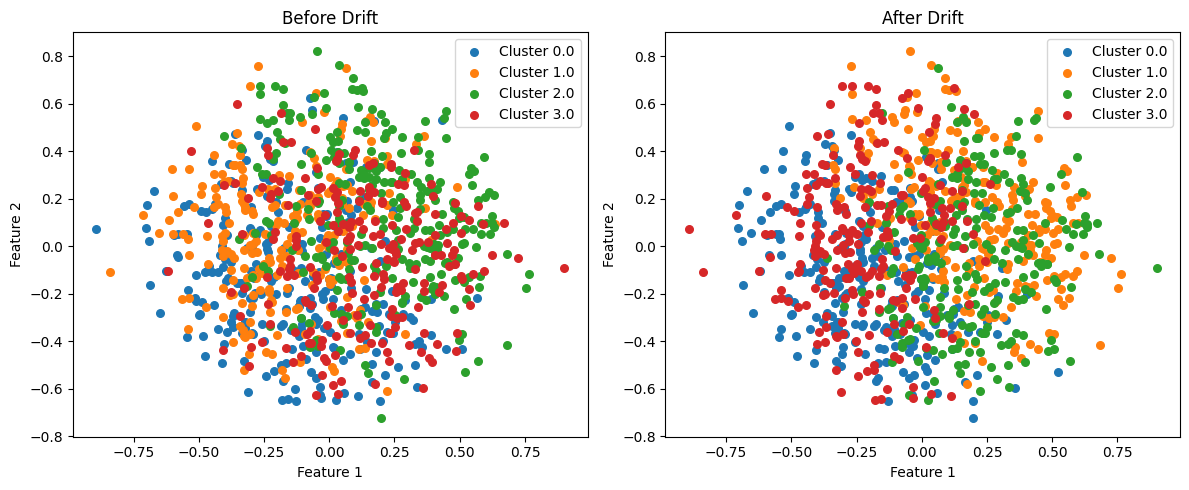

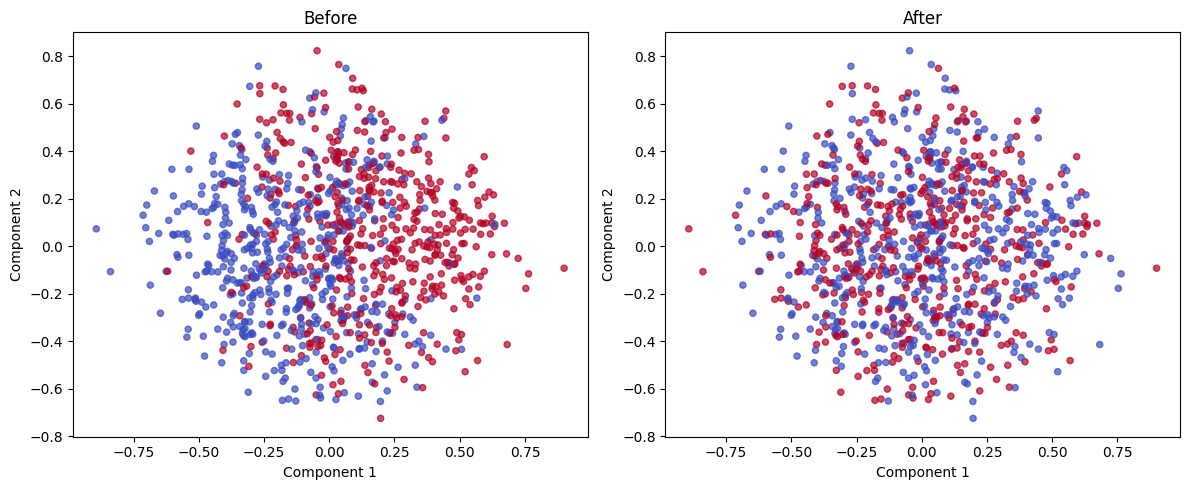

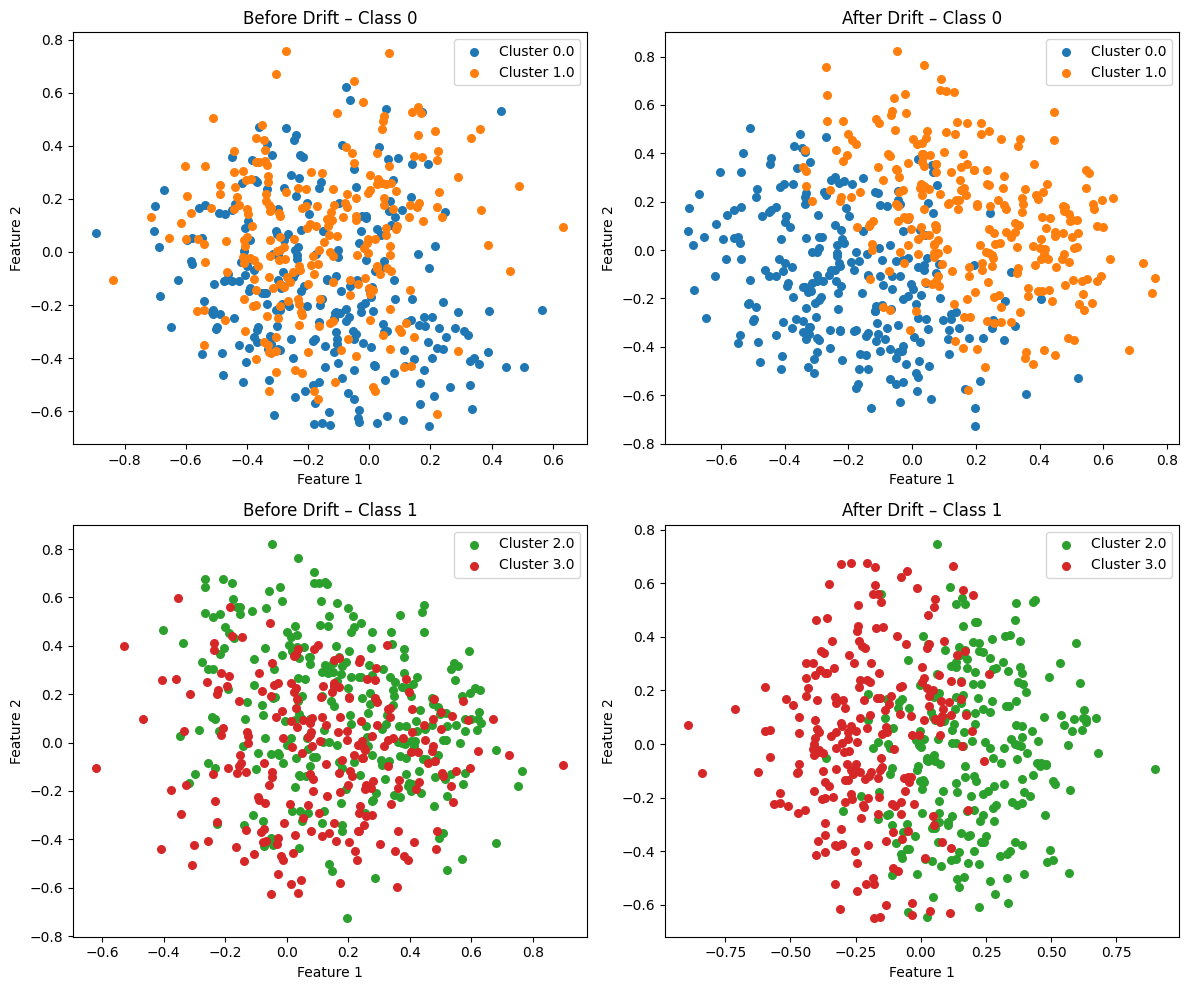

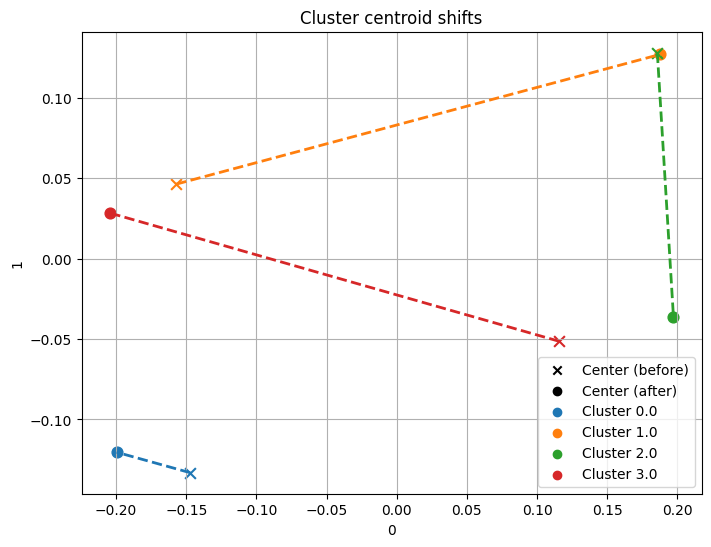

In [35]:
conduct_experiments_hyperplane_multidimensional(1000, 5, 2)

### **7.3.2. SEA**

**1. SEA - all features (including the irrelevant one)**

In [36]:
def conduct_experiments_sea(size_of_block, nr_of_features, reducer_type= ReducerType.PCA):
    generator = get_dataset("sea_drift")
    X, y = generator.generate(size_of_block, size_of_block, n_features=nr_of_features)

    X_old, X_new = X.loc[:size_of_block-1], X.loc[size_of_block:]
    y_old, y_new = y[:size_of_block], y[size_of_block:]

    CBDD = ClusterBasedDriftDetector(X_old, y_old, X_new, y_new)
    CBDD.detect()

    labels_old = CBDD.cluster_labels_old
    labels_new = CBDD.cluster_labels_new

    print(f"Drift detected?: {CBDD.drift_flag}")
    print(CBDD.drift_details)

    # PCA
    if nr_of_features > 2:
        DDM = DataDimensionsReducer()
        X_merged = np.vstack([X_old, X_new])
        X_reduced = DDM.reduce(reducer_type, X_merged)

        X_old_reduced, X_new_reduced = X_reduced[:len(X_old)], X_reduced[len(X_old):]
    else:
        X_old_reduced, X_new_reduced = X_old.values, X_new.values

    plot_drift_clustered(X_old_reduced, X_new_reduced, labels_old, labels_new)
    plot_drift(X_old_reduced, y_old, X_new_reduced, y_new)

    plot_clusters_by_class(X_old_reduced, X_new_reduced, y_old, y_new, labels_old, labels_new)

    plot_centers_shift(pd.DataFrame(X_old_reduced), pd.DataFrame(X_new_reduced), labels_old, labels_new)

Drift detected?: True
{np.False_: {'nr_of_clusters': False, 'centroid_shift': True, 'desc_stats_changes': {np.float64(0.0): {0: {'max': np.False_, 'mean': np.False_, 'median': np.False_, 'min': np.True_, 'std': np.False_}, 1: {'max': np.True_, 'mean': np.True_, 'median': np.True_, 'min': np.True_, 'std': np.False_}}, np.float64(1.0): {0: {'max': np.True_, 'mean': np.False_, 'median': np.False_, 'min': np.True_, 'std': np.True_}, 1: {'max': np.True_, 'mean': np.True_, 'median': np.True_, 'min': np.False_, 'std': np.True_}}}}, np.True_: {'nr_of_clusters': False, 'centroid_shift': True, 'desc_stats_changes': {np.float64(2.0): {0: {'max': np.False_, 'mean': np.False_, 'median': np.False_, 'min': np.False_, 'std': np.False_}, 1: {'max': np.False_, 'mean': np.False_, 'median': np.False_, 'min': np.False_, 'std': np.False_}}, np.float64(3.0): {0: {'max': np.False_, 'mean': np.False_, 'median': np.False_, 'min': np.False_, 'std': np.False_}, 1: {'max': np.False_, 'mean': np.False_, 'median': n

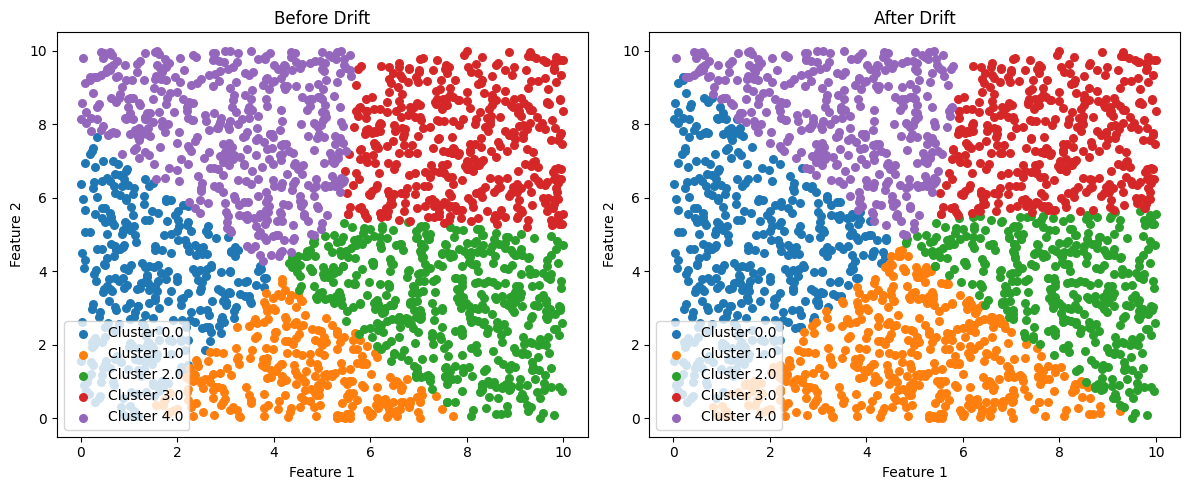

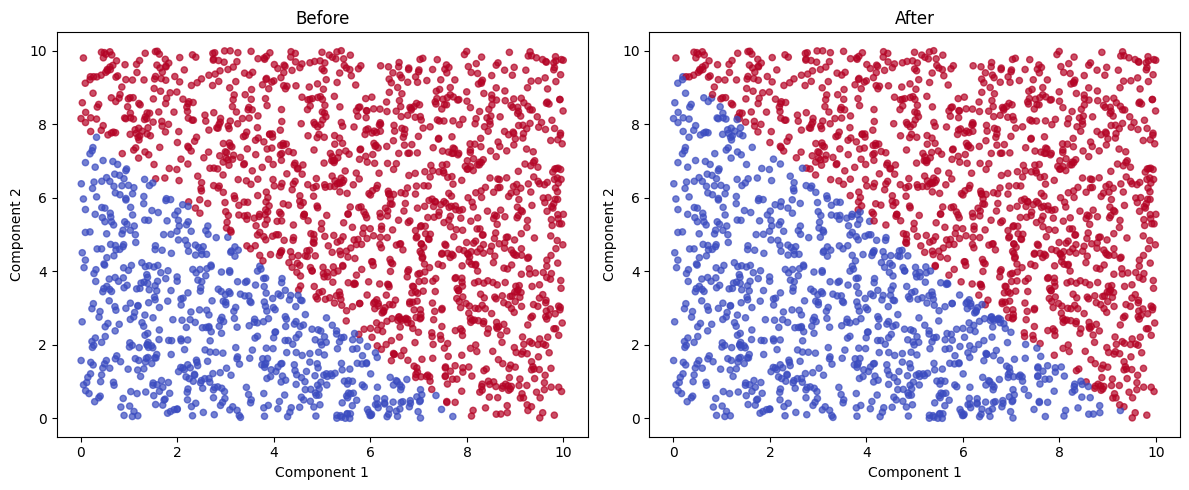

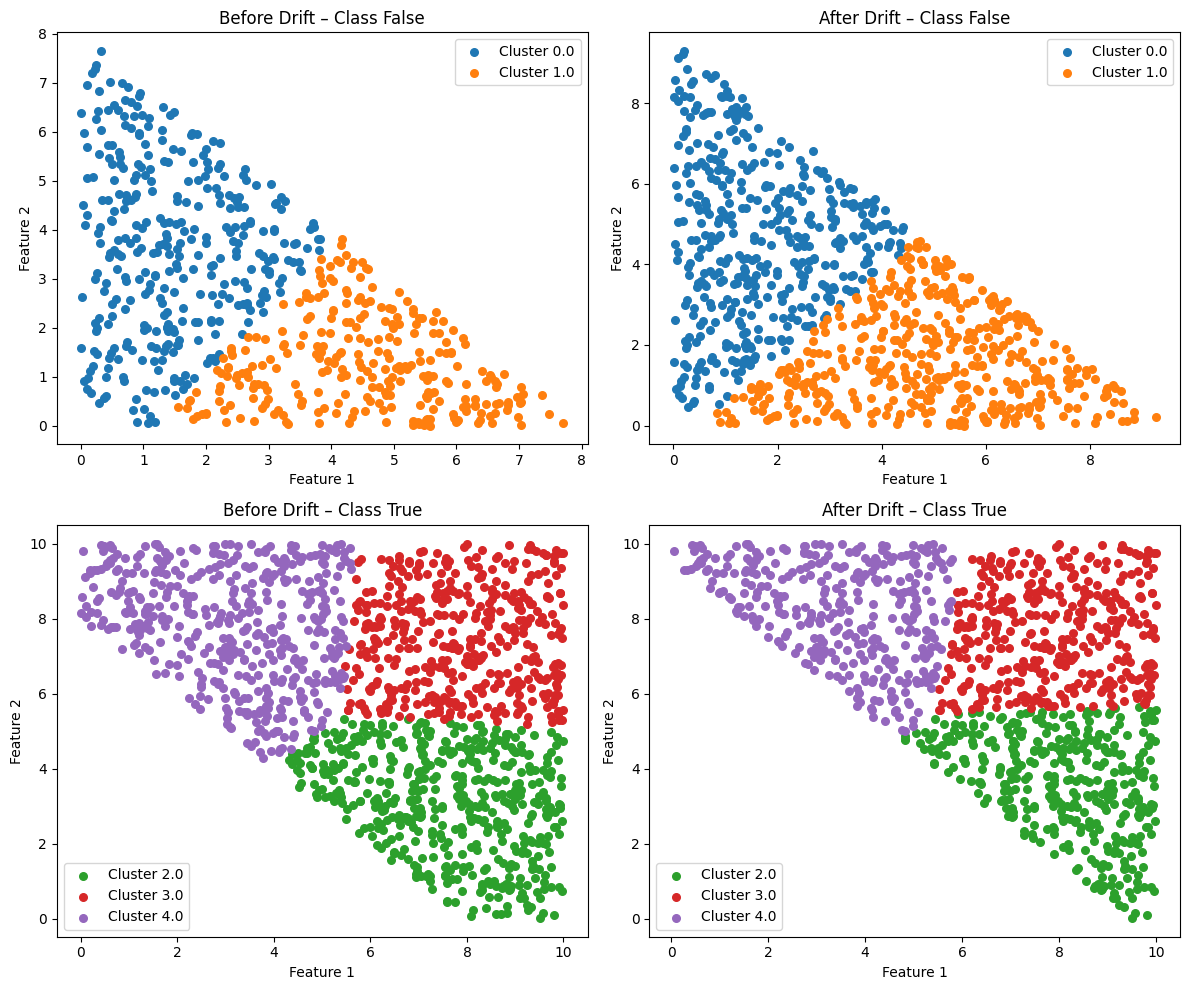

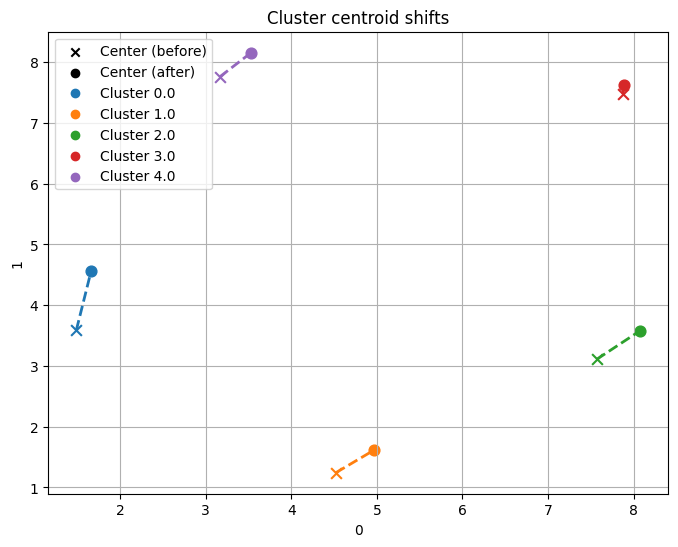

In [37]:
conduct_experiments_sea(2000, 2)

**2. SEA but only with all features**

Drift detected?: True
{np.False_: {'nr_of_clusters': False, 'centroid_shift': True, 'desc_stats_changes': {np.float64(0.0): {0: {'max': np.True_, 'mean': np.True_, 'median': np.True_, 'min': np.True_, 'std': np.True_}, 1: {'max': np.True_, 'mean': np.False_, 'median': np.False_, 'min': np.False_, 'std': np.False_}, 2: {'max': np.False_, 'mean': np.False_, 'median': np.False_, 'min': np.False_, 'std': np.False_}}, np.float64(1.0): {0: {'max': np.True_, 'mean': np.False_, 'median': np.False_, 'min': np.True_, 'std': np.True_}, 1: {'max': np.True_, 'mean': np.True_, 'median': np.True_, 'min': np.False_, 'std': np.True_}, 2: {'max': np.False_, 'mean': np.False_, 'median': np.False_, 'min': np.True_, 'std': np.False_}}, np.float64(2.0): {0: {'max': np.False_, 'mean': np.False_, 'median': np.False_, 'min': np.False_, 'std': np.False_}, 1: {'max': np.False_, 'mean': np.True_, 'median': np.True_, 'min': np.True_, 'std': np.False_}, 2: {'max': np.True_, 'mean': np.False_, 'median': np.False_, '

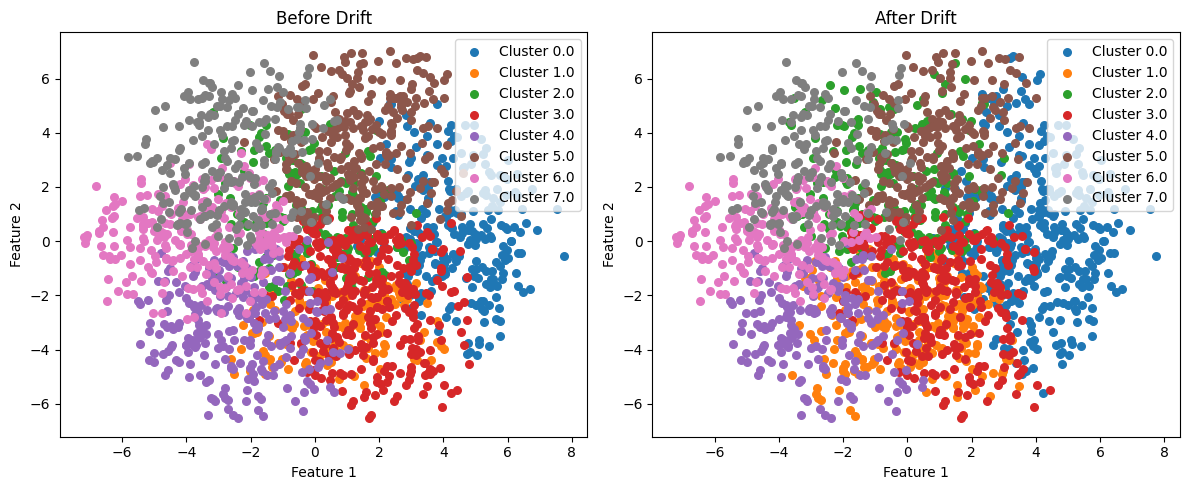

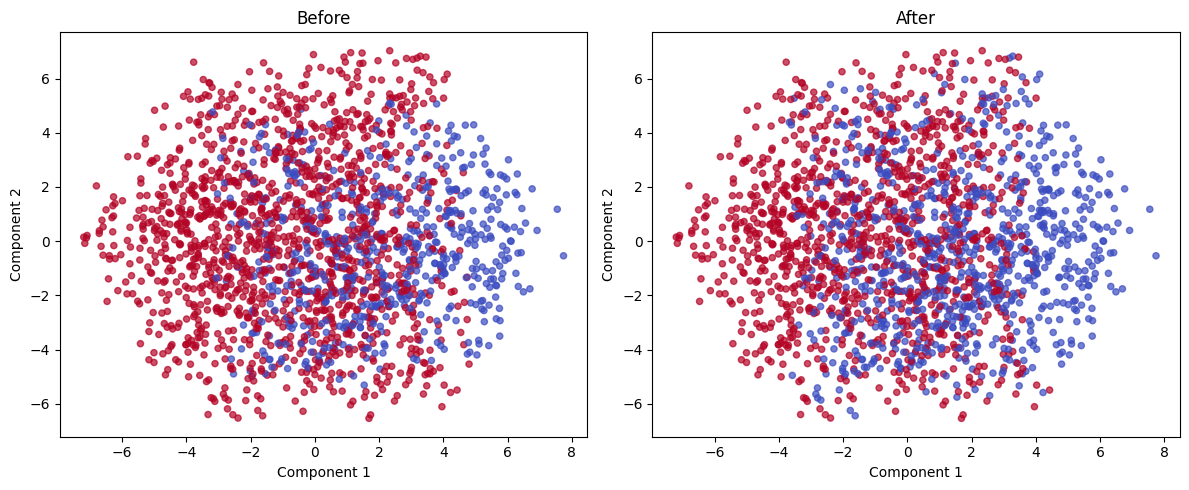

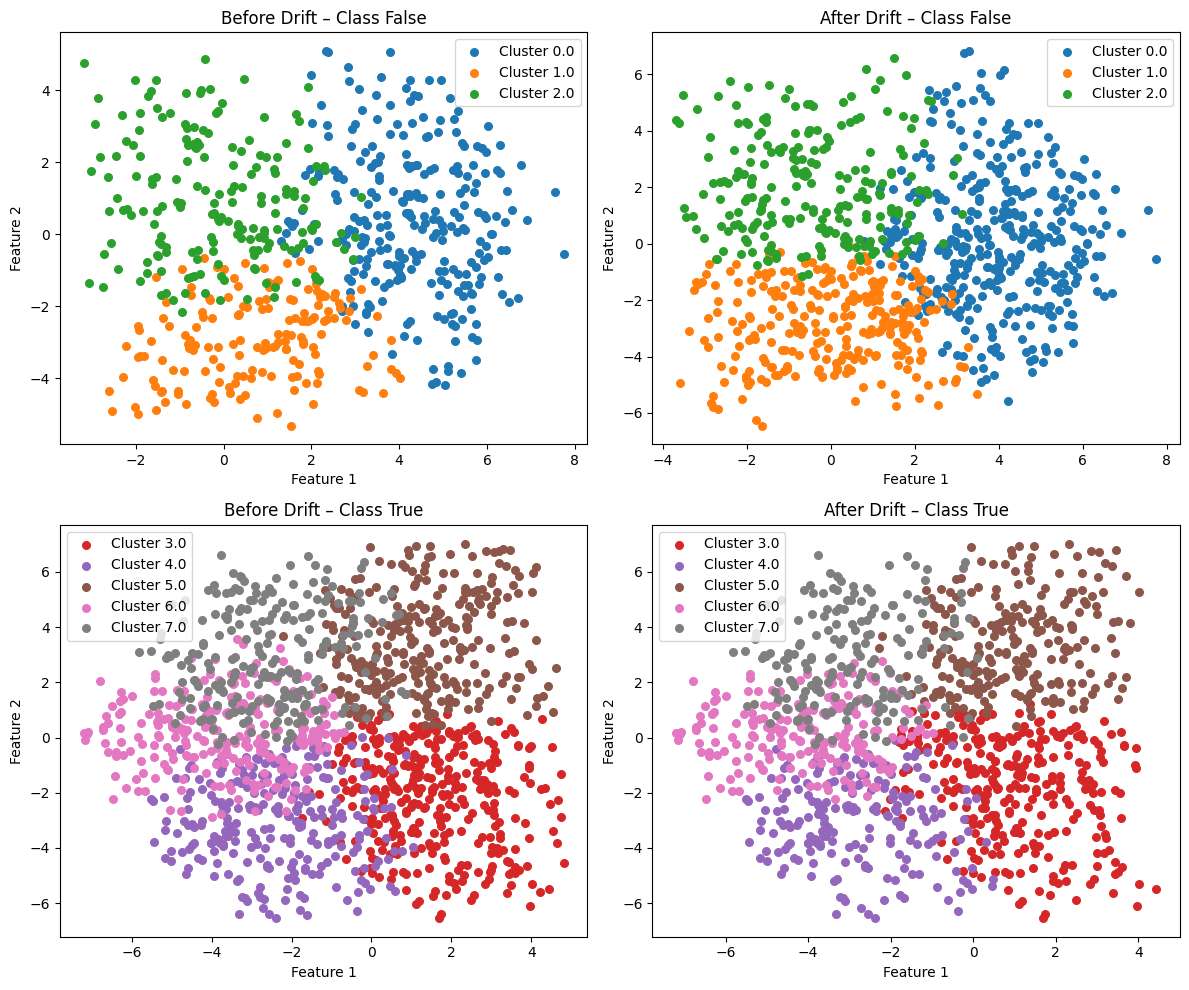

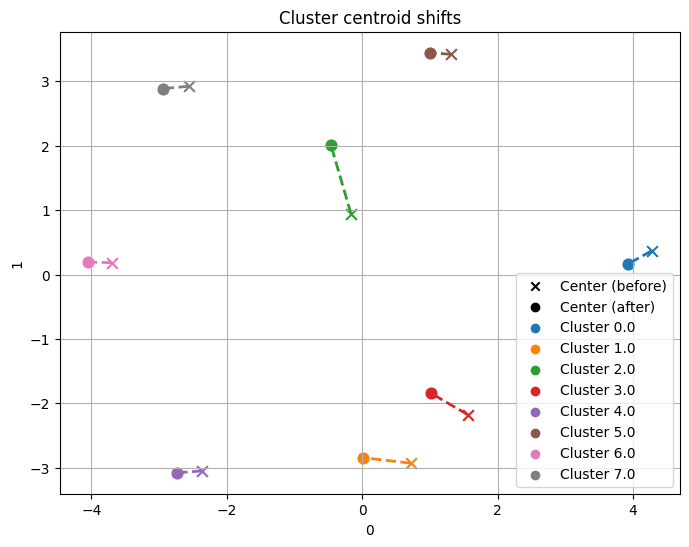

In [38]:
conduct_experiments_sea(2000, 3)

### **7.3.3. RBF**

In [39]:
def conduct_experiments_random_rbf(size_of_block, nr_of_features, reducer_type= ReducerType.PCA):
    # TODO: abstrkacja funkcji do ekspetymentow
    generator = get_dataset("random_rbf_drift")
    X, y = generator.generate(size_of_block, size_of_block, n_features=nr_of_features)

    X_old, X_new = X.loc[:size_of_block-1], X.loc[size_of_block:]
    y_old, y_new = y[:size_of_block], y[size_of_block:]

    CBDD = ClusterBasedDriftDetector(X_old, y_old, X_new, y_new)
    CBDD.detect()

    labels_old = CBDD.cluster_labels_old
    labels_new = CBDD.cluster_labels_new

    print(f"Drift detected?: {CBDD.drift_flag}")
    print(CBDD.drift_details)

    # PCA
    if nr_of_features > 2:
        DDM = DataDimensionsReducer()
        X_merged = np.vstack([X_old, X_new])
        X_reduced = DDM.reduce(reducer_type, X_merged)

        X_old_reduced, X_new_reduced = X_reduced[:len(X_old)], X_reduced[len(X_old):]
    else:
        X_old_reduced, X_new_reduced = X_old.values, X_new.values

    plot_drift_clustered(X_old_reduced, X_new_reduced, labels_old, labels_new)
    plot_drift(X_old_reduced, y_old, X_new_reduced, y_new)

    plot_clusters_by_class(X_old_reduced, X_new_reduced, y_old, y_new, labels_old, labels_new)

    plot_centers_shift(pd.DataFrame(X_old_reduced), pd.DataFrame(X_new_reduced), labels_old, labels_new)

In [40]:
# conduct_experiments_random_RBF(1000, 2)

### **7.3.4. SDBM**

In [43]:
def conduct_experiments_sdbm(size_of_block, reducer_type= ReducerType.PCA):
    generator = get_dataset("sdbm_rbf_drift")
    X, y = generator.generate(size_of_block, size_of_block, drift_width=0)

    X_old, X_new = X.loc[:size_of_block-1], X.loc[size_of_block:]
    y_old, y_new = y[:size_of_block], y[size_of_block:]

    CBDD = ClusterBasedDriftDetector(X_old, y_old, X_new, y_new)
    CBDD.detect()

    labels_old = CBDD.cluster_labels_old
    labels_new = CBDD.cluster_labels_new

    print(f"Drift detected?: {CBDD.drift_flag}")
    print(CBDD.drift_details)

    # PCA
    DDM = DataDimensionsReducer()
    X_merged = np.vstack([X_old, X_new])
    X_reduced = DDM.reduce(reducer_type, X_merged)
    X_old_reduced, X_new_reduced = X_reduced[:len(X_old)], X_reduced[len(X_old):]

    plot_drift_clustered(X_old_reduced, X_new_reduced, labels_old, labels_new)
    plot_drift(X_old_reduced, y_old, X_new_reduced, y_new)

    plot_clusters_by_class(X_old_reduced, X_new_reduced, y_old, y_new, labels_old, labels_new)

    plot_centers_shift(pd.DataFrame(X_old_reduced), pd.DataFrame(X_new_reduced), labels_old, labels_new)

Drift detected?: True
{np.int64(0): {'nr_of_clusters': False, 'centroid_shift': True, 'desc_stats_changes': {np.float64(0.0): {0: {'max': np.False_, 'mean': np.False_, 'median': np.False_, 'min': np.False_, 'std': np.False_}, 1: {'max': np.True_, 'mean': np.True_, 'median': np.True_, 'min': np.True_, 'std': np.False_}, 2: {'max': np.True_, 'mean': np.True_, 'median': np.True_, 'min': np.True_, 'std': np.False_}, 3: {'max': np.False_, 'mean': np.False_, 'median': np.False_, 'min': np.False_, 'std': np.False_}}, np.float64(1.0): {0: {'max': np.False_, 'mean': np.False_, 'median': np.False_, 'min': np.False_, 'std': np.False_}, 1: {'max': np.True_, 'mean': np.True_, 'median': np.True_, 'min': np.True_, 'std': np.False_}, 2: {'max': np.True_, 'mean': np.True_, 'median': np.True_, 'min': np.True_, 'std': np.False_}, 3: {'max': np.False_, 'mean': np.False_, 'median': np.False_, 'min': np.False_, 'std': np.False_}}}}, np.int64(1): {'nr_of_clusters': False, 'centroid_shift': True, 'desc_stats_

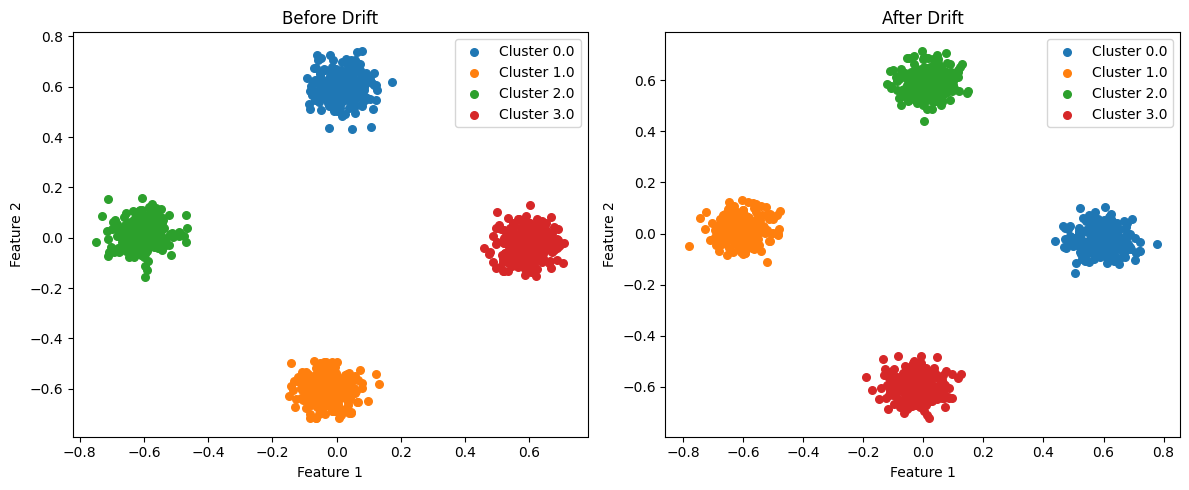

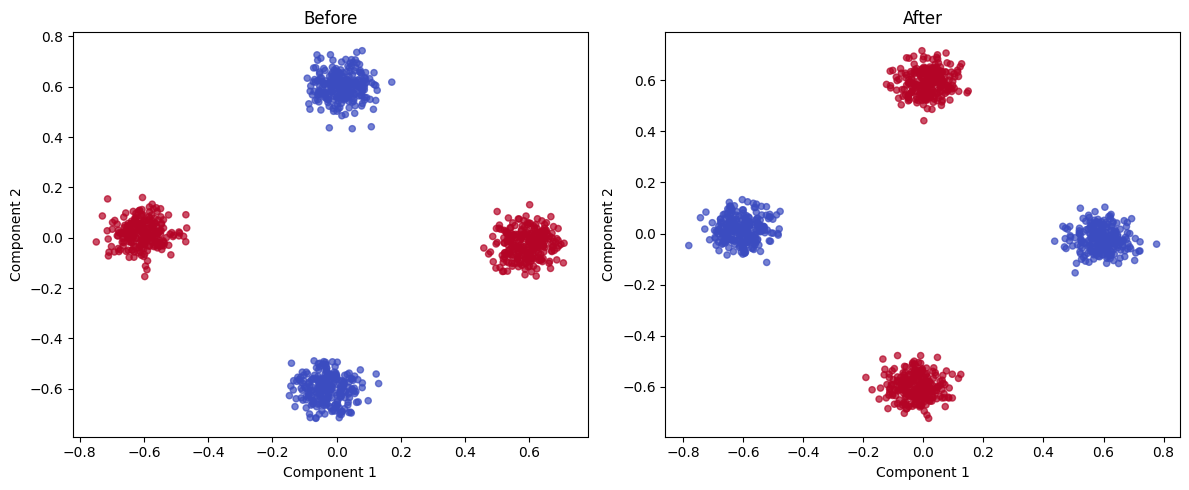

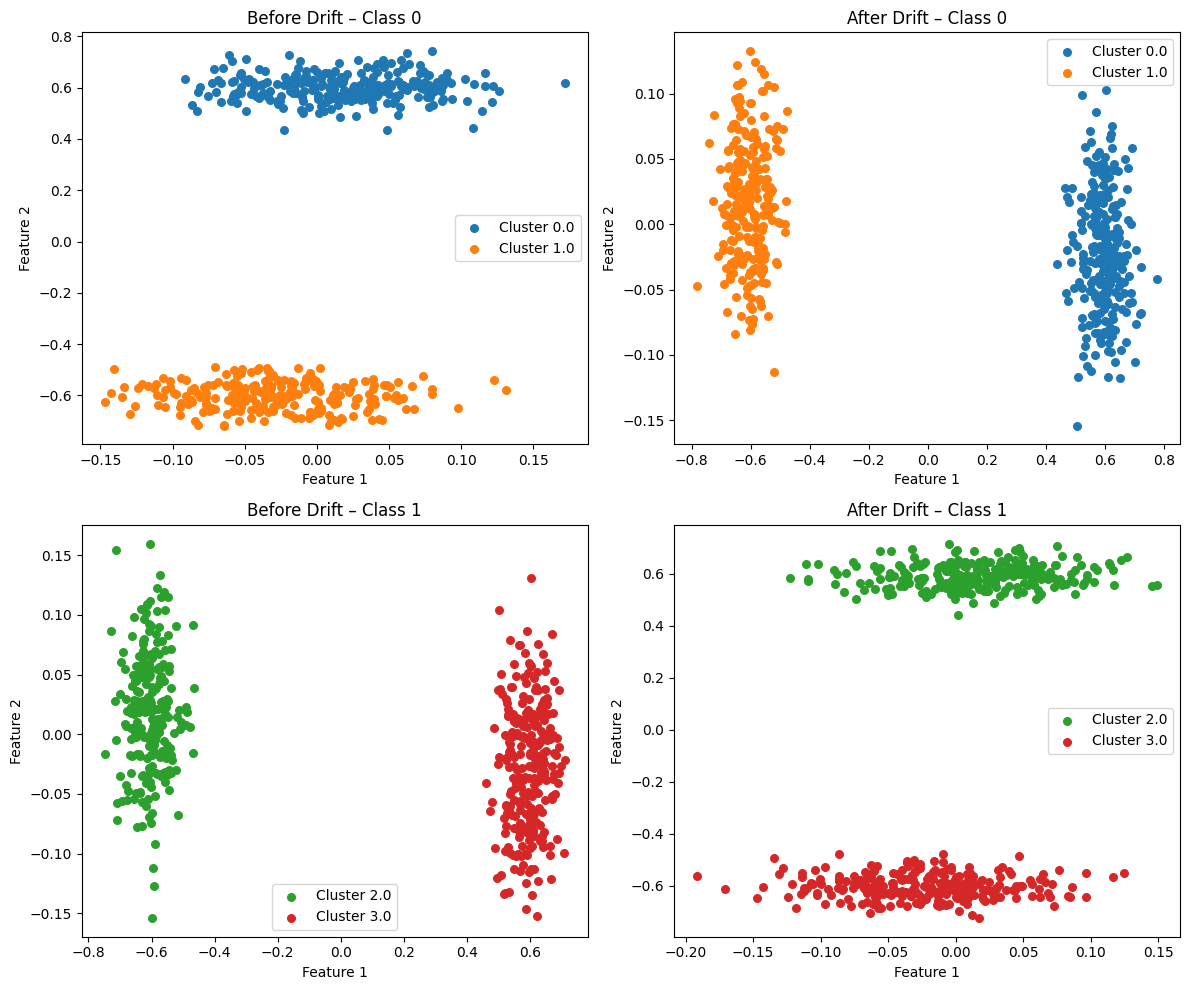

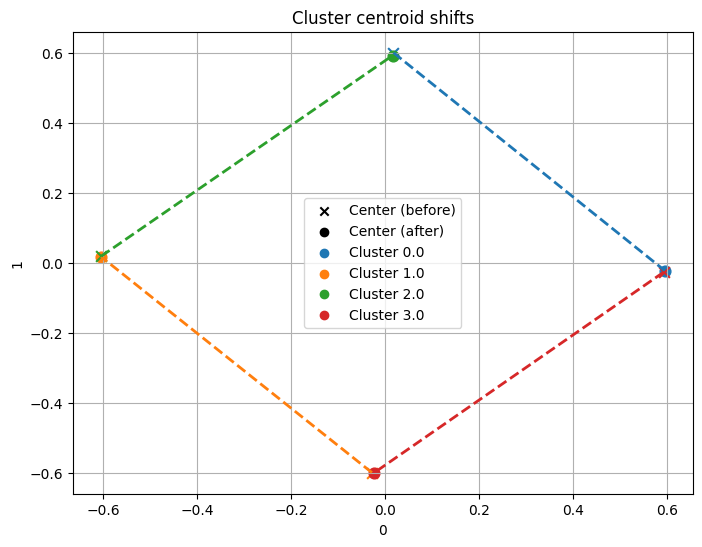

In [44]:
conduct_experiments_sdbm(1000)

### **7.3.5. Controlled Concept Drift**

In [45]:
def conduct_experiments_custom_concept_drift(size_of_block, n_features, n_drift_features, reducer_type= ReducerType.PCA):
    generator = get_dataset("controlled_concept_drift")
    X, y = generator.generate(size_of_block, size_of_block, n_features, n_drift_features)

    X_old, X_new = X.loc[:size_of_block-1], X.loc[size_of_block:]
    y_old, y_new = y[:size_of_block], y[size_of_block:]

    CBDD = ClusterBasedDriftDetector(X_old, y_old, X_new, y_new)
    CBDD.detect()

    labels_old = CBDD.cluster_labels_old
    labels_new = CBDD.cluster_labels_new

    print(f"Drift detected?: {CBDD.drift_flag}")
    print(CBDD.drift_details)

    # PCA
    if n_features > 2:
        DDM = DataDimensionsReducer()
        X_merged = np.vstack([X_old, X_new])
        X_reduced = DDM.reduce(reducer_type, X_merged)
        X_old_reduced, X_new_reduced = X_reduced[:len(X_old)], X_reduced[len(X_old):]
    else:
        X_old_reduced, X_new_reduced = X_old.values, X_new.values

    plot_drift_clustered(X_old_reduced, X_new_reduced, labels_old, labels_new)
    plot_drift(X_old_reduced, y_old, X_new_reduced, y_new)

    plot_clusters_by_class(X_old_reduced, X_new_reduced, y_old, y_new, labels_old, labels_new)

    plot_centers_shift(pd.DataFrame(X_old_reduced), pd.DataFrame(X_new_reduced), labels_old, labels_new)

**1. 2D Custom Concept Drift**

Drift detected?: True
{np.int64(0): {'nr_of_clusters': True, 'centroid_shift': True, 'desc_stats_changes': {np.float64(0.0): {0: {'max': np.True_, 'mean': np.True_, 'median': np.True_, 'min': np.True_, 'std': np.True_}, 1: {'max': np.False_, 'mean': np.True_, 'median': np.True_, 'min': np.False_, 'std': np.True_}}, np.float64(1.0): {0: {'max': True, 'mean': True, 'median': True, 'min': True, 'std': True}, 1: {'max': True, 'mean': True, 'median': True, 'min': True, 'std': True}}, np.float64(2.0): {0: {'max': np.False_, 'mean': np.True_, 'median': np.True_, 'min': np.False_, 'std': np.False_}, 1: {'max': np.True_, 'mean': np.True_, 'median': np.True_, 'min': np.True_, 'std': np.True_}}}}, np.int64(1): {'nr_of_clusters': False, 'centroid_shift': True, 'desc_stats_changes': {np.float64(3.0): {0: {'max': np.True_, 'mean': np.True_, 'median': np.True_, 'min': np.True_, 'std': np.True_}, 1: {'max': np.False_, 'mean': np.True_, 'median': np.True_, 'min': np.True_, 'std': np.True_}}, np.float64

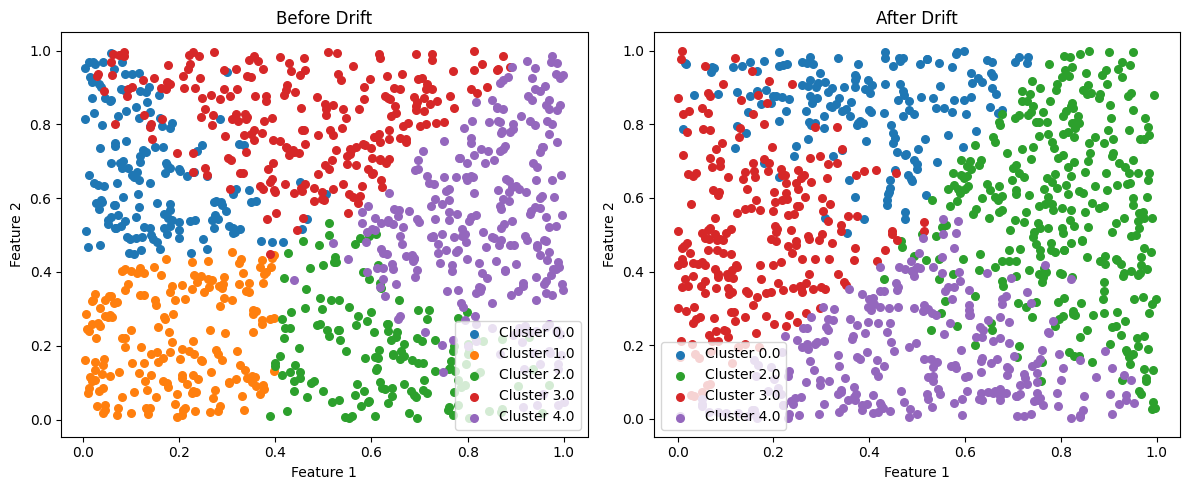

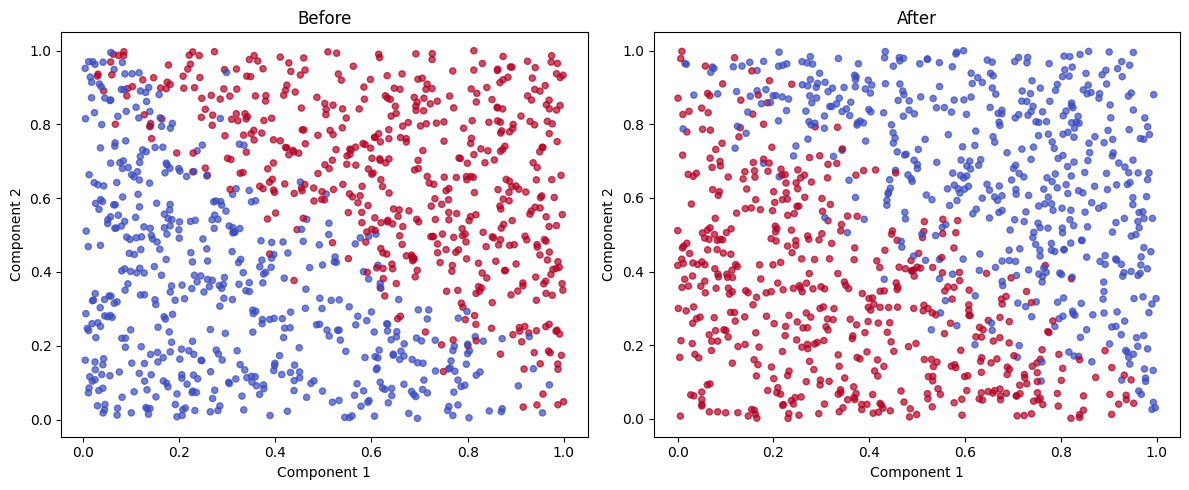

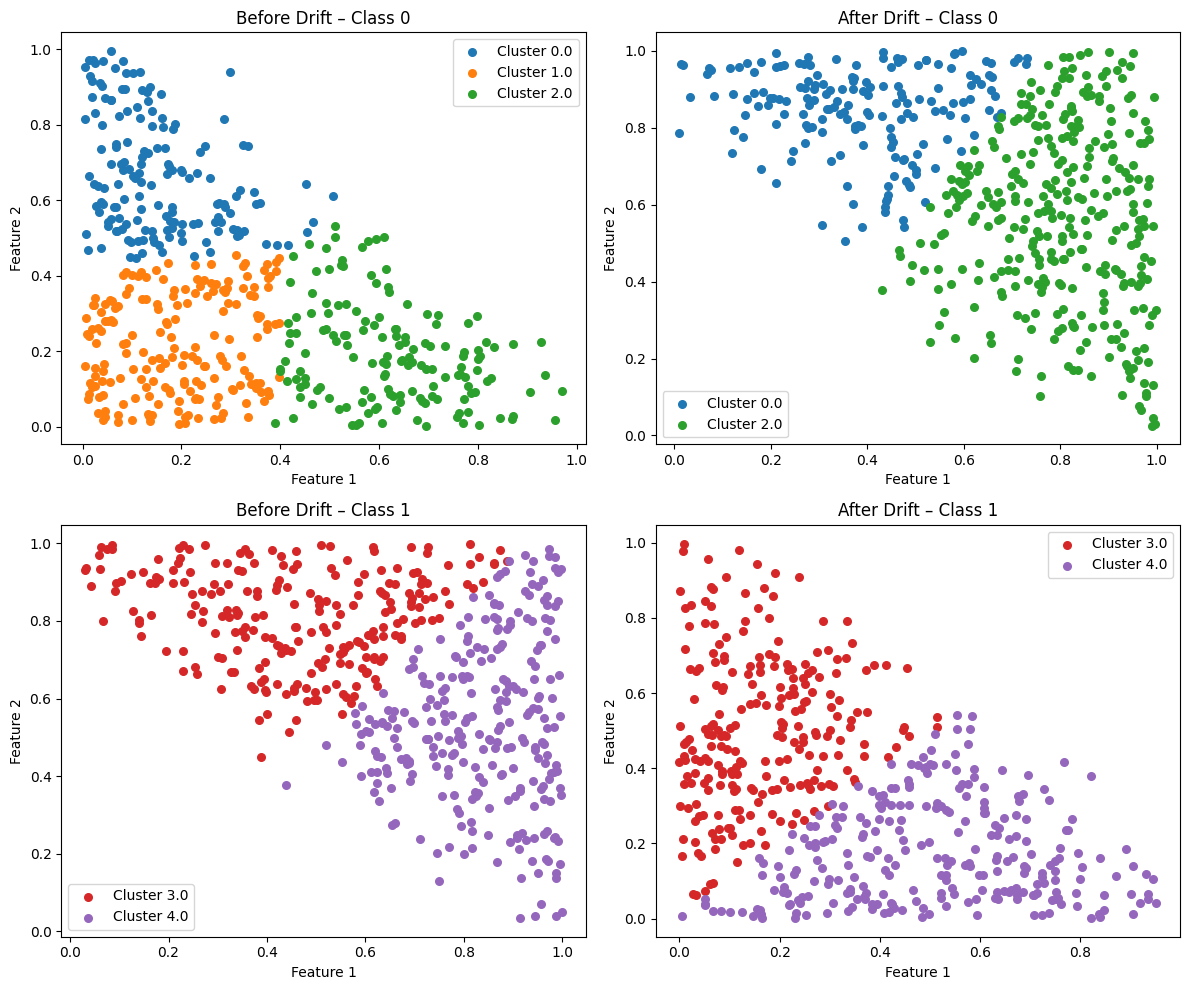

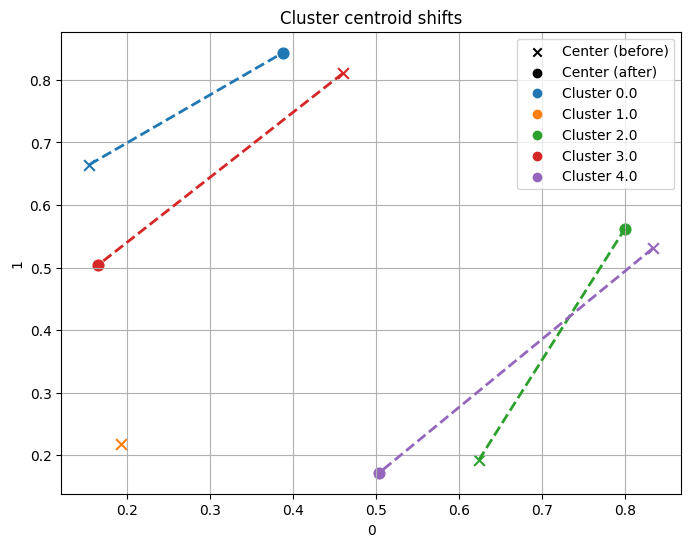

In [46]:
conduct_experiments_custom_concept_drift(1000, 2, 2, reducer_type=ReducerType.PCA)

**2. Higher Dimensions Custom Concept Drift**

Drift detected?: True
{np.int64(0): {'nr_of_clusters': False, 'centroid_shift': True, 'desc_stats_changes': {np.float64(0.0): {0: {'max': np.False_, 'mean': np.True_, 'median': np.True_, 'min': np.True_, 'std': np.False_}, 1: {'max': np.True_, 'mean': np.True_, 'median': np.False_, 'min': np.False_, 'std': np.True_}, 2: {'max': np.False_, 'mean': np.False_, 'median': np.False_, 'min': np.True_, 'std': np.False_}, 3: {'max': np.True_, 'mean': np.True_, 'median': np.True_, 'min': np.True_, 'std': np.True_}}, np.float64(1.0): {0: {'max': np.False_, 'mean': np.True_, 'median': np.True_, 'min': np.True_, 'std': np.True_}, 1: {'max': np.False_, 'mean': np.True_, 'median': np.True_, 'min': np.True_, 'std': np.True_}, 2: {'max': np.False_, 'mean': np.False_, 'median': np.True_, 'min': np.True_, 'std': np.False_}, 3: {'max': np.False_, 'mean': np.True_, 'median': np.True_, 'min': np.True_, 'std': np.True_}}}}, np.int64(1): {'nr_of_clusters': False, 'centroid_shift': True, 'desc_stats_changes': 

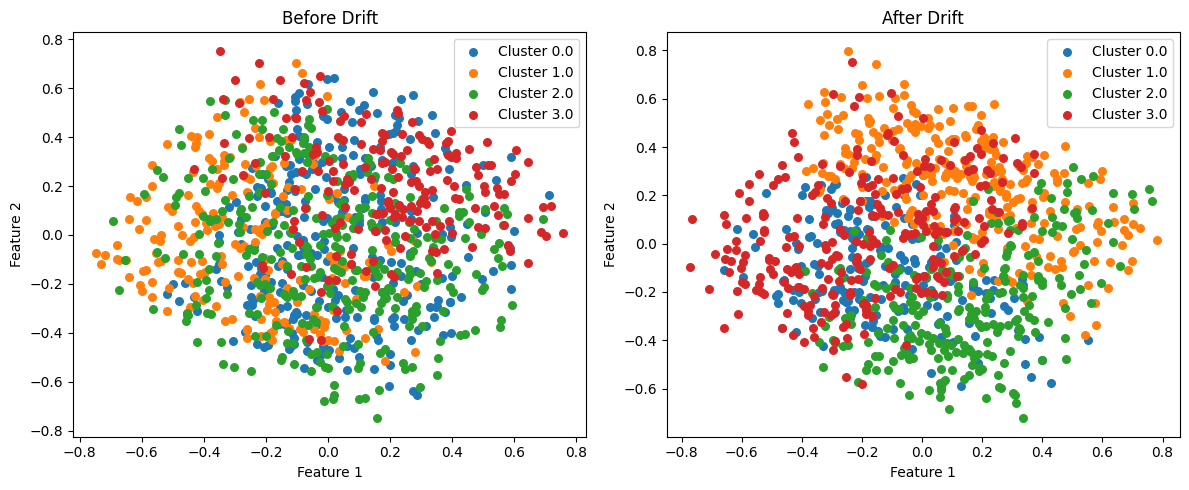

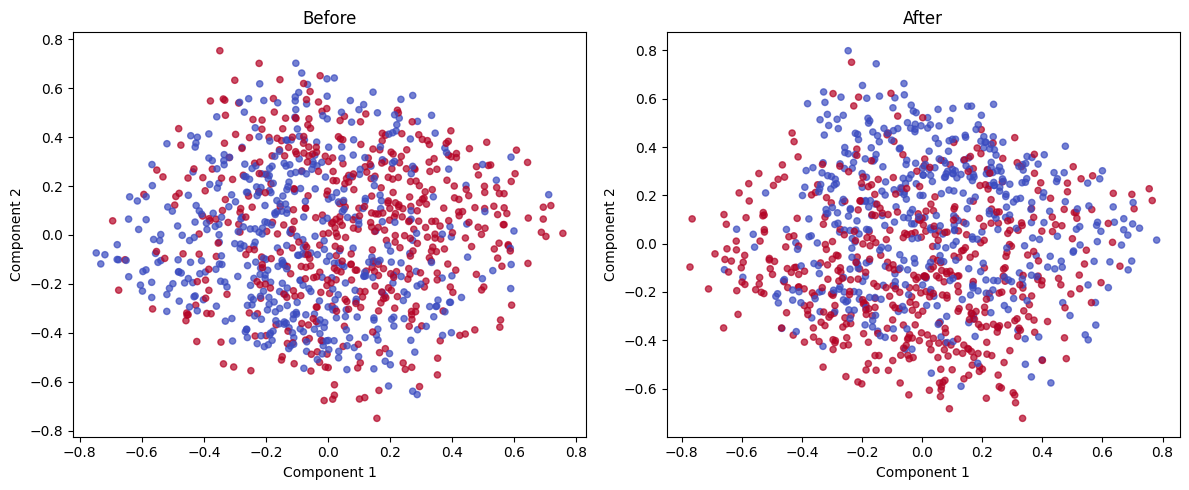

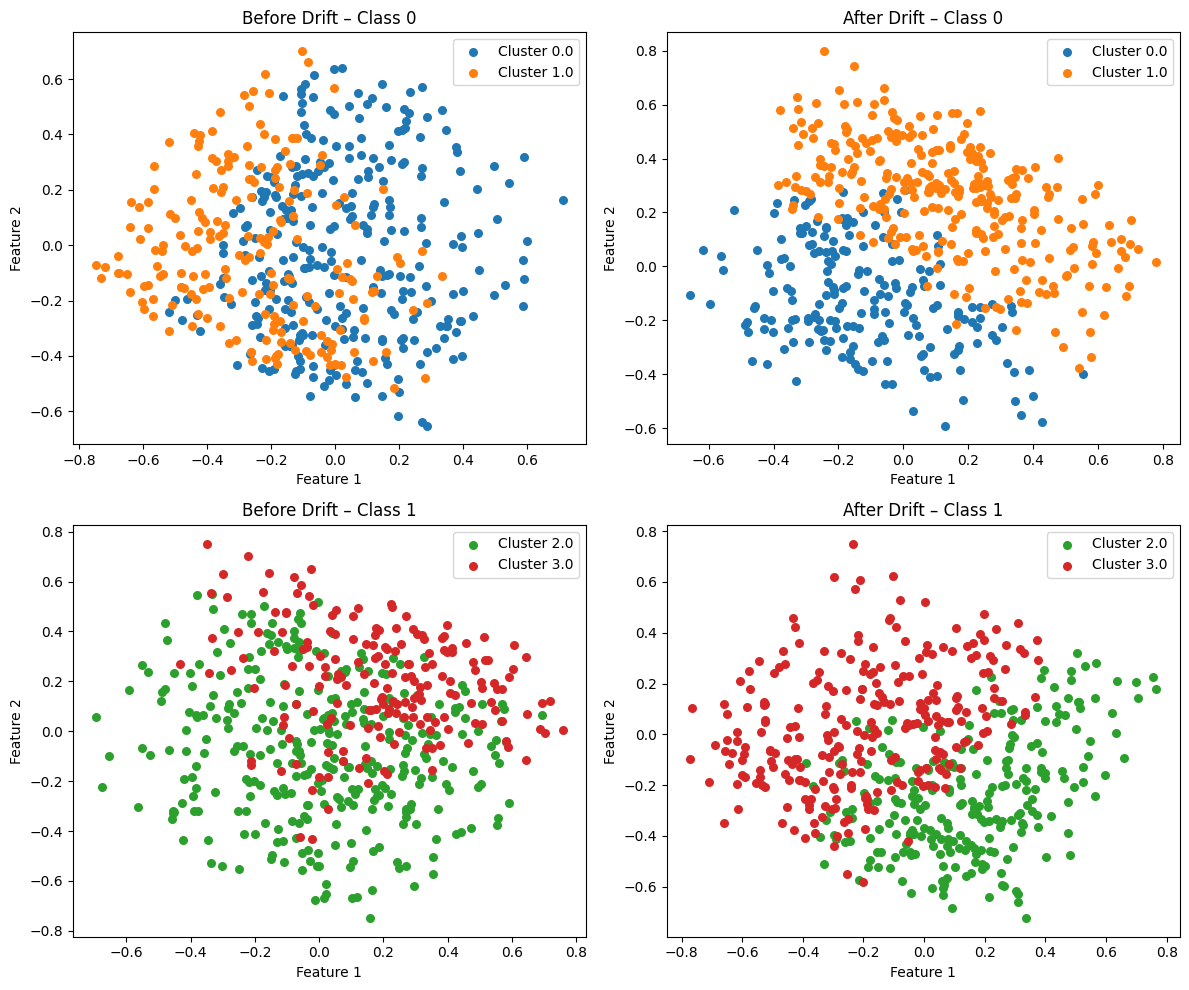

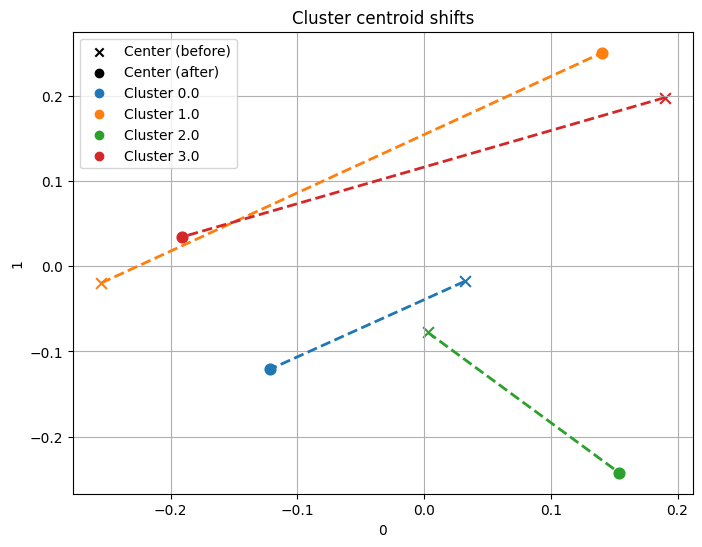

In [47]:
conduct_experiments_custom_concept_drift(1000, 4, 2, reducer_type=ReducerType.PCA)

**3. Custom concept Drift Default Parameters**

Drift detected?: True
{np.int64(0): {'nr_of_clusters': False, 'centroid_shift': True, 'desc_stats_changes': {np.float64(0.0): {0: {'max': np.False_, 'mean': np.True_, 'median': np.True_, 'min': np.True_, 'std': np.False_}, 1: {'max': np.False_, 'mean': np.True_, 'median': np.True_, 'min': np.True_, 'std': np.False_}, 2: {'max': np.False_, 'mean': np.True_, 'median': np.True_, 'min': np.False_, 'std': np.False_}, 3: {'max': np.False_, 'mean': np.True_, 'median': np.True_, 'min': np.True_, 'std': np.False_}, 4: {'max': np.False_, 'mean': np.False_, 'median': np.False_, 'min': np.True_, 'std': np.False_}, 5: {'max': np.False_, 'mean': np.True_, 'median': np.True_, 'min': np.True_, 'std': np.False_}, 6: {'max': np.False_, 'mean': np.True_, 'median': np.True_, 'min': np.True_, 'std': np.False_}, 7: {'max': np.False_, 'mean': np.False_, 'median': np.False_, 'min': np.True_, 'std': np.False_}, 8: {'max': np.False_, 'mean': np.False_, 'median': np.False_, 'min': np.True_, 'std': np.False_}, 9:

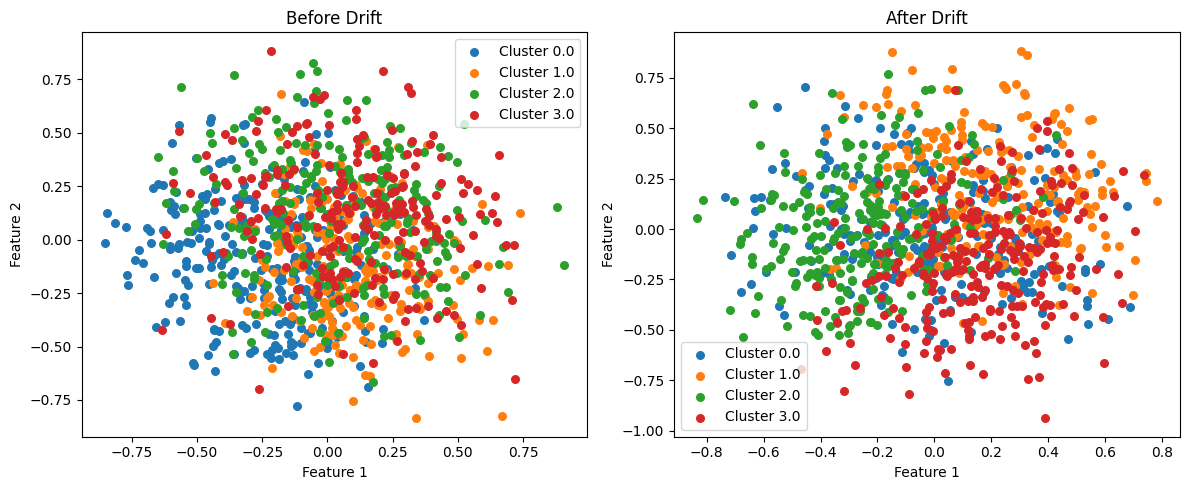

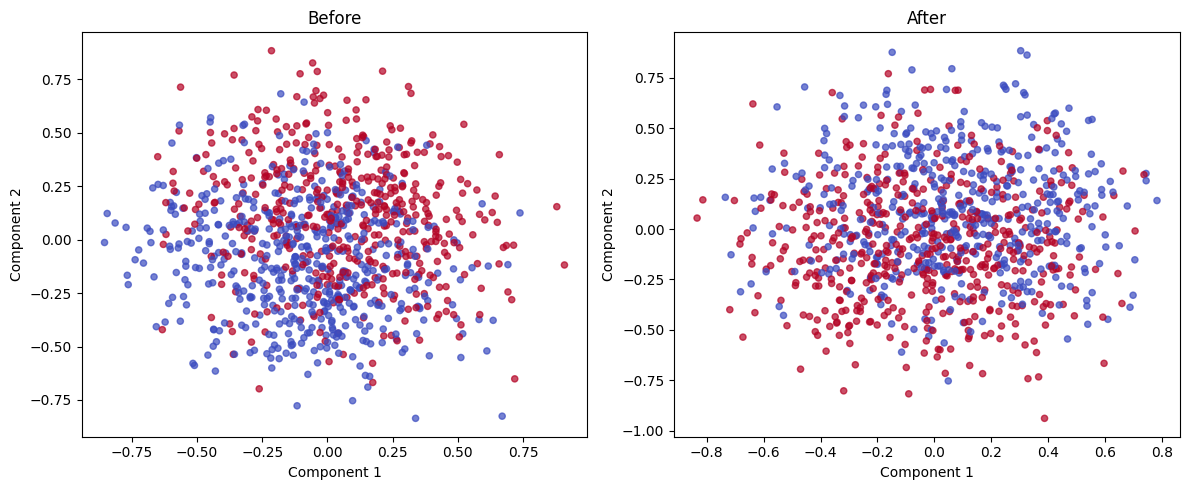

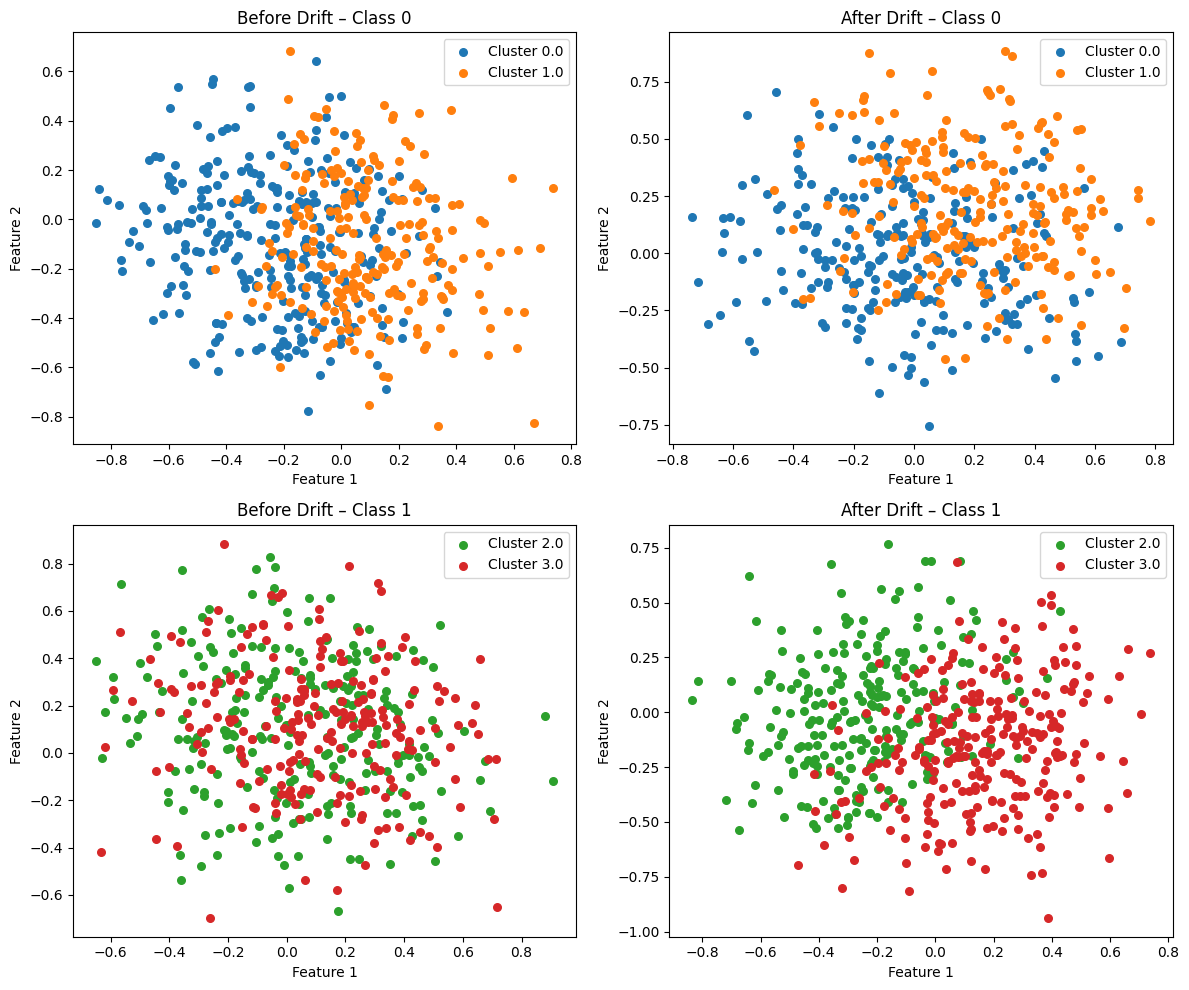

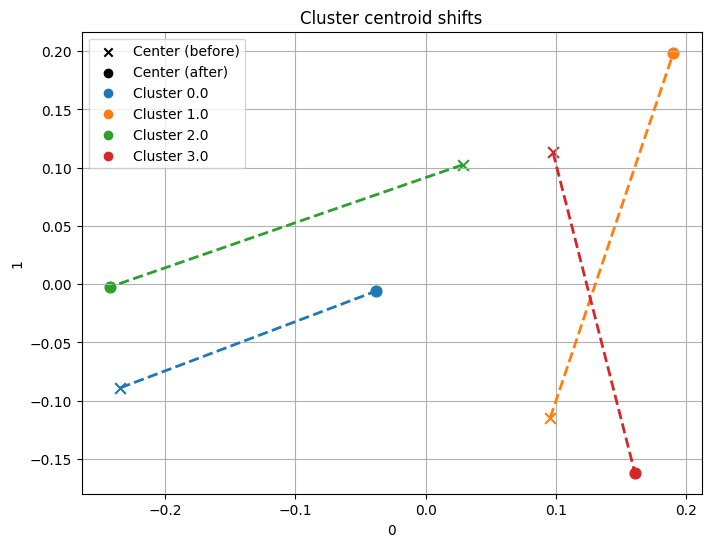

In [48]:
conduct_experiments_custom_concept_drift(1000, 11, 5)